#INN Hotels: Problem Statement

**Context:**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which is beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in a reduction of the profit margin.
4. Human resources to make arrangements for the guests.

**Objective:**


The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, and they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. As a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which bookings are going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

**Data Description:**
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

Data Dictionary:

Booking_ID: the unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

Not Selected – No meal plan selected

Meal Plan 1 – Breakfast

Meal Plan 2 – Half board (breakfast and one other meal)

Meal Plan 3 – Full board (breakfast, lunch, and dinner)

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

lead_time: Number of days between the date of booking and the arrival date
arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.


Let's start by importing necessary libraries

In [142]:
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer

)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV



In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset

In [144]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/INNHotelsGroup.csv')

Overview of the dataset

In [145]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

The dataset contains information about the different booking status of a hotel.

Copy data into another Veriable

In [146]:
df=data.copy()


Checking data OverView

In [147]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [148]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

Understand the shape of the dataset.

In [149]:
df.shape

(36275, 19)

There are 36275 rows and 19 columns in the dataset.

Check the data types of the columns in the dataset.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are total 19 columns and 36275 observations in the dataset

We have 13 continuous variables -

one variable is float type

All other variables are categorical
:
We can see that there are no missing values in the dataset.

#Checking duplicates

In [151]:
df.duplicated().sum()

np.int64(0)

In [152]:
df.drop('Booking_ID', axis=1, inplace=True)

Removing Booking ID becouse it not play any importent rol in our data set

# Checking null values

In [153]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Statistical summary of the data

---



In [154]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

Max No of Adults is 4.0

Max no of children is 10.0

Avg price of pre room max is 540

In [155]:
# Printing number of count of each unique value in each column
for column in df.columns:
    print(df[column].value_counts())
    print("-" * 40)
print("\nMissing values per column:")
display(df.isnull().sum())

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
----------------------------------------
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
----------------------------------------
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
----------------------------------------
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
----------------------------------------
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
----------------------------------------
required_car_parking_space
0    35151
1     1124
Name: count,

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [156]:
# Identify categorical columns dynamically
categorical_cols = df.select_dtypes(include='object').columns

for column in categorical_cols:
    print(df[column].value_counts())
    print("-" * 40)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
----------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
----------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
----------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
----------------------------------------


There is no Any Nan Value in givn data set  

Most of the people who stay in hotel preffered meal plan 1
Room type 1 is highest room type tp resiverd
Not Canceled a room chances is higher then chance of Canceled

#Univariate analysis

In [157]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Univariate analysis of numerical variables


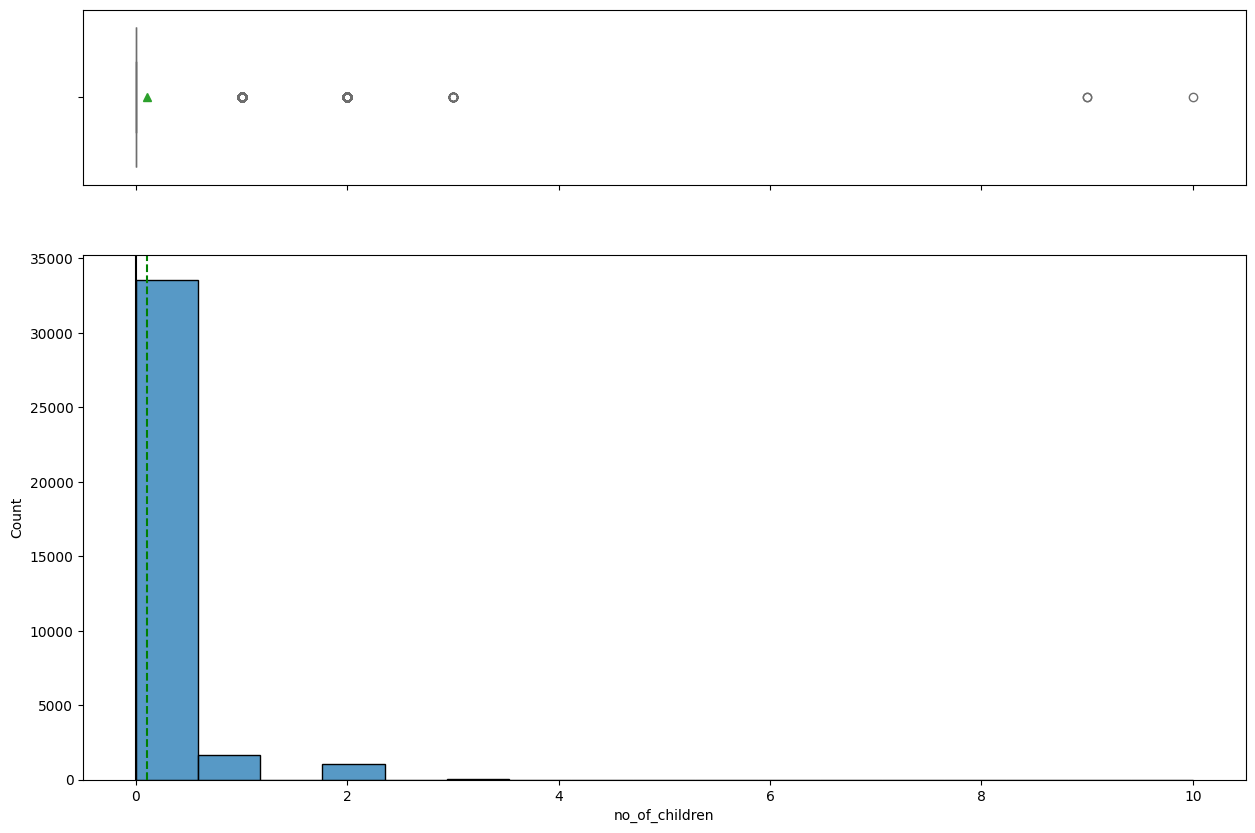

In [158]:
histogram_boxplot(df, "no_of_children")

Generate histogram and boxplot for 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room', and 'no_of_special_requests' columns.



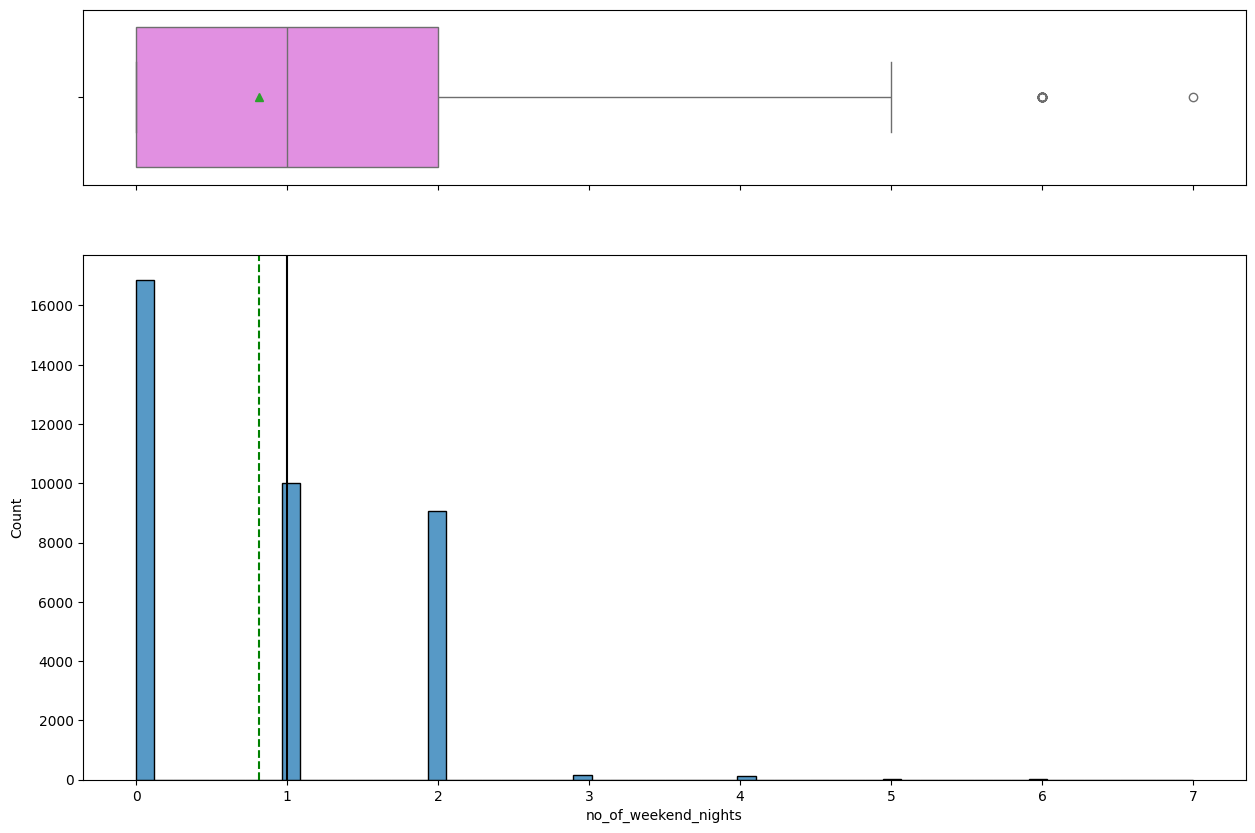

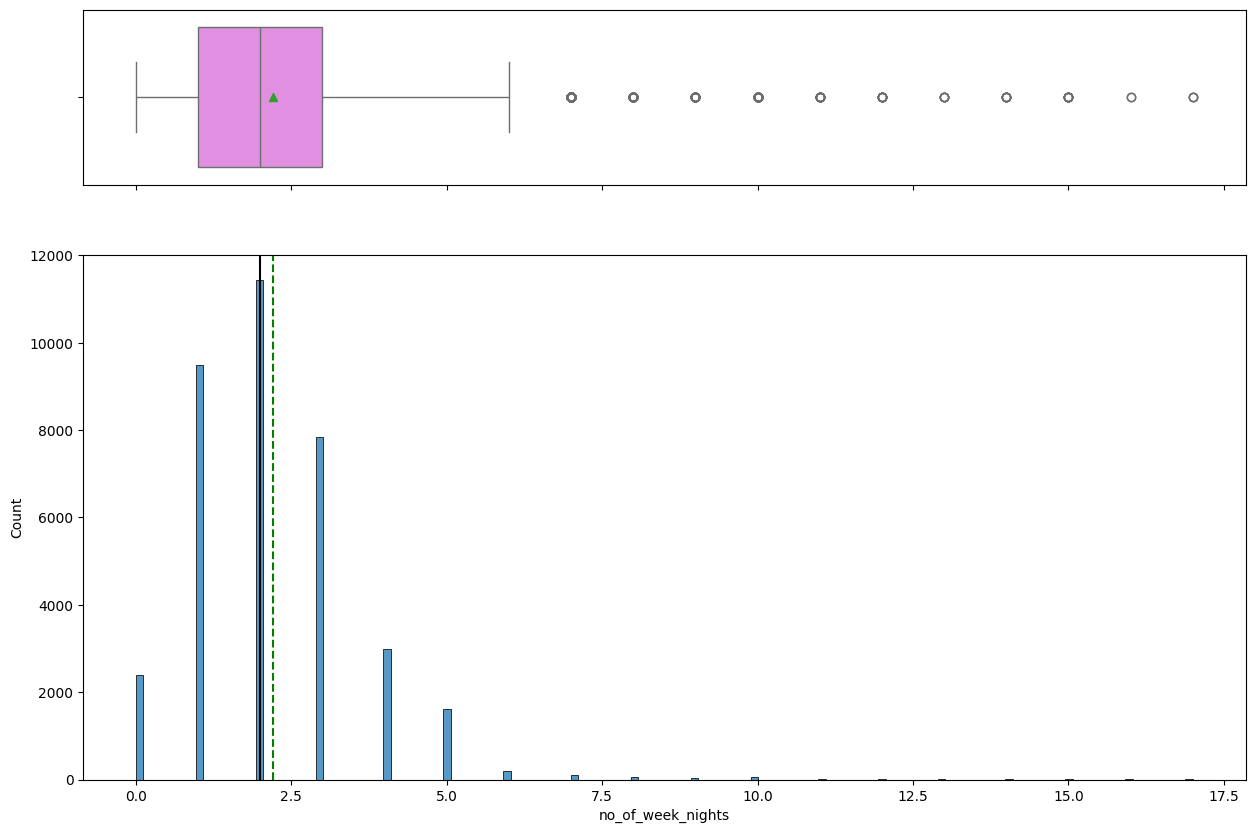

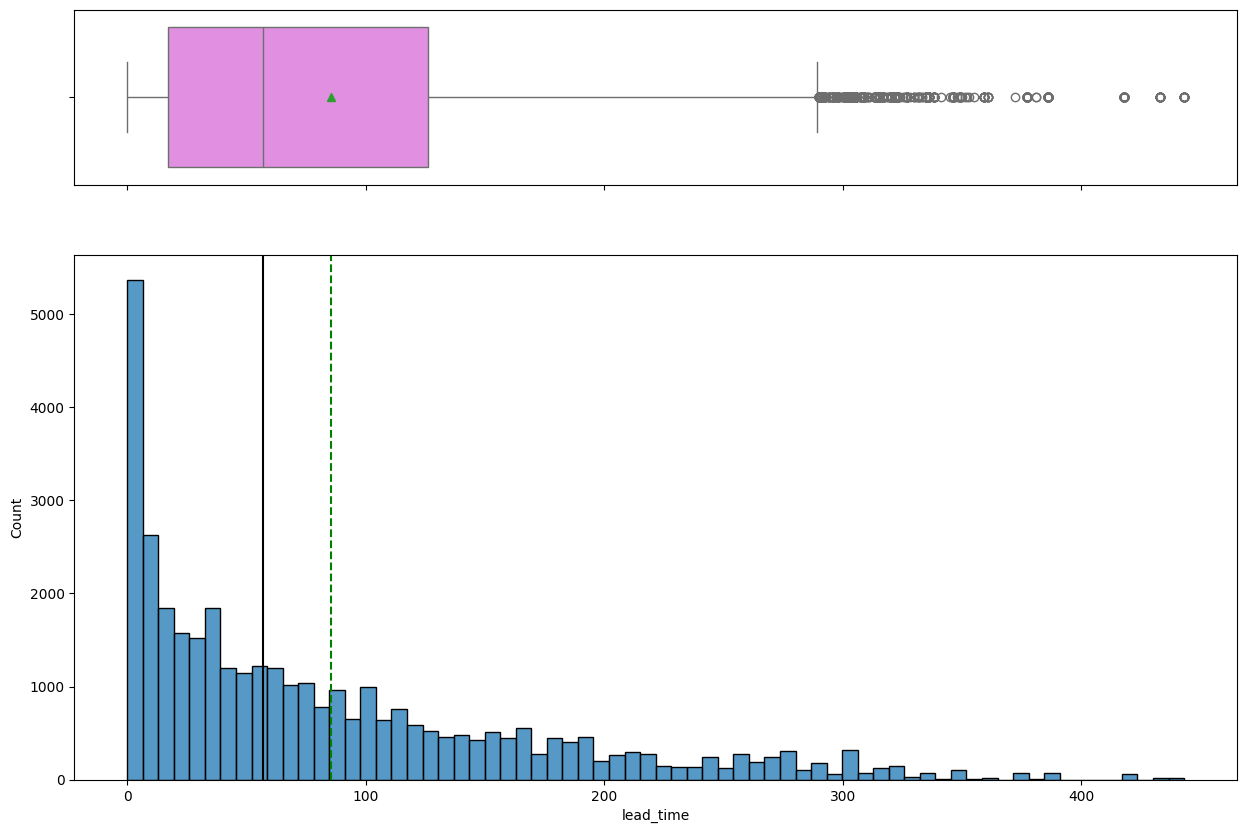

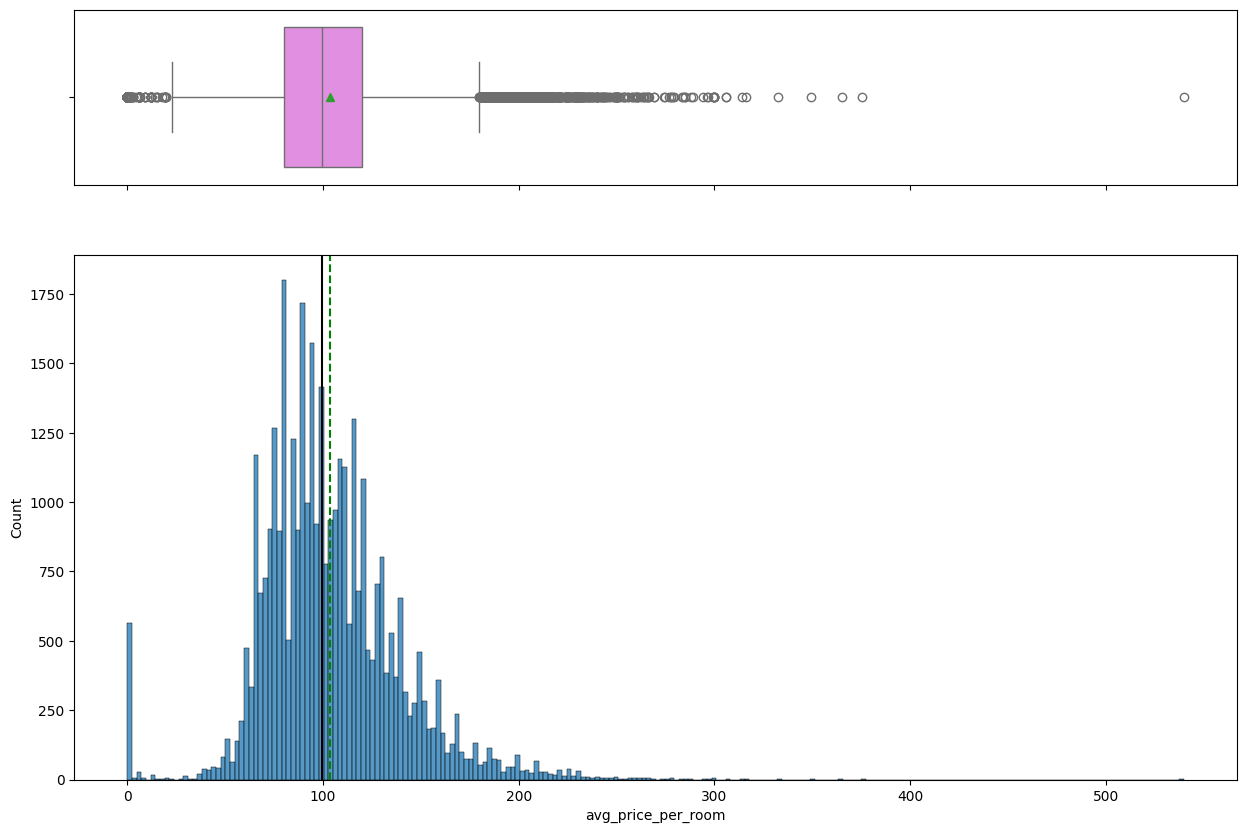

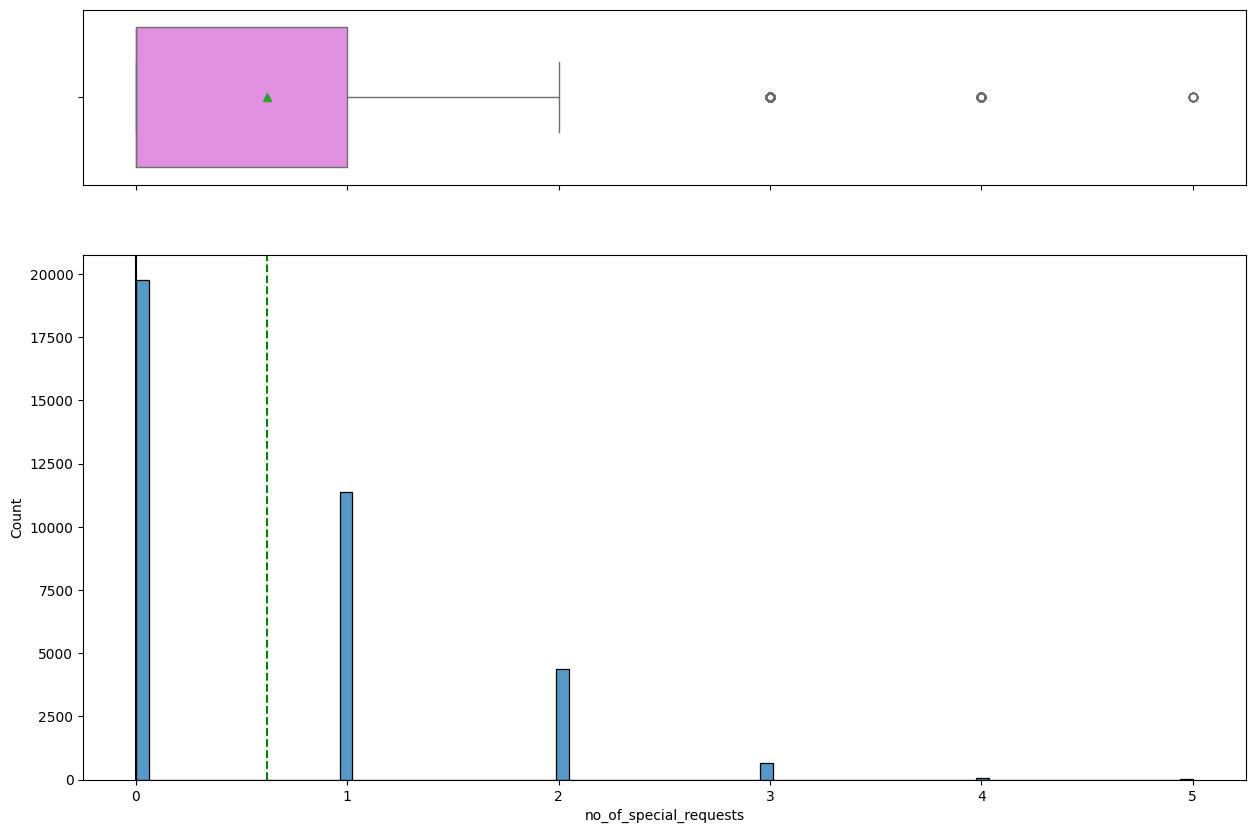

In [159]:
histogram_boxplot(df, "no_of_weekend_nights")
histogram_boxplot(df, "no_of_week_nights")
histogram_boxplot(df, "lead_time")
histogram_boxplot(df, "avg_price_per_room")
histogram_boxplot(df, "no_of_special_requests")

Observations from univariate analysis of numerical variables:

no_of_adults:
- The majority of bookings are for 2 adults, with a smaller number for 1 or 3 adults.
- There are some outliers with 0 or 4 adults.

no_of_children:
- Most bookings have no children.
- There are outliers with a higher number of children.

no_of_weekend_nights:
- The distribution is skewed towards fewer weekend nights.
- The majority of bookings have 0, 1, or 2 weekend nights.

no_of_week_nights:
- The distribution is skewed towards fewer weeknights.
- The majority of bookings have between 1 and 3 weeknights.

lead_time:
- The distribution is highly skewed to the right, indicating that most bookings are made with a short lead time.
- There are many outliers with very long lead times.

avg_price_per_room:
- The distribution is skewed to the right with a peak around the mean.
- There are outliers with very high average prices per room.

no_of_special_requests:
- The majority of bookings have no special requests.
- The distribution is skewed to the right, with fewer bookings having multiple special requests.

## Univariate analysis of categorical variables



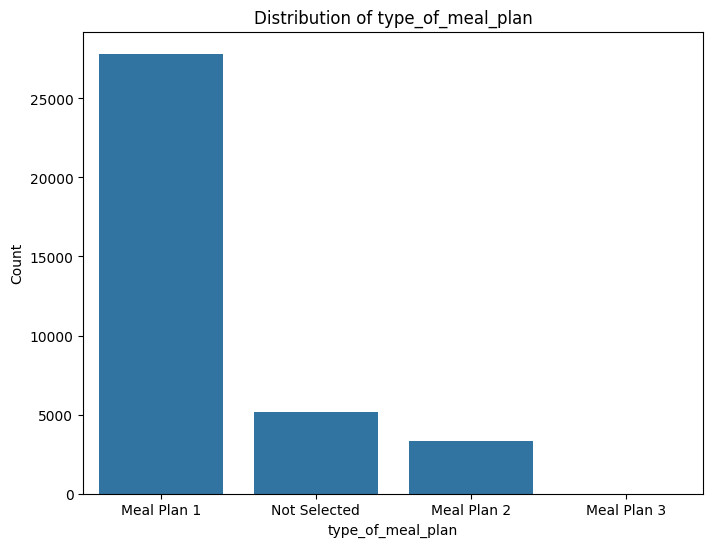

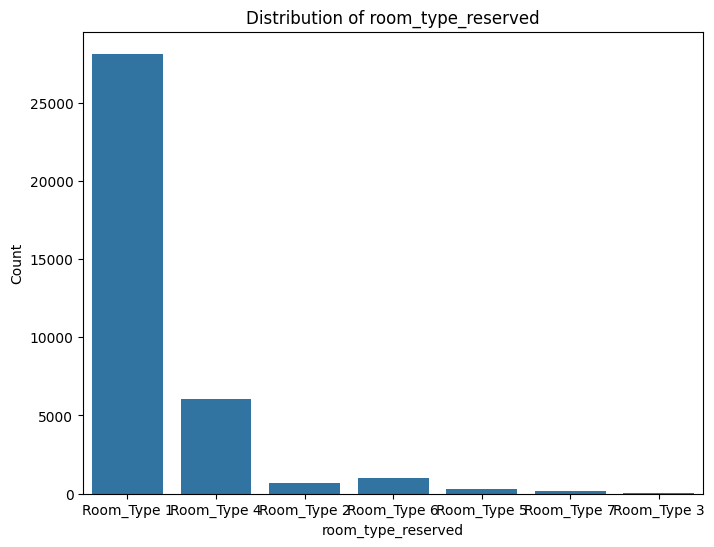

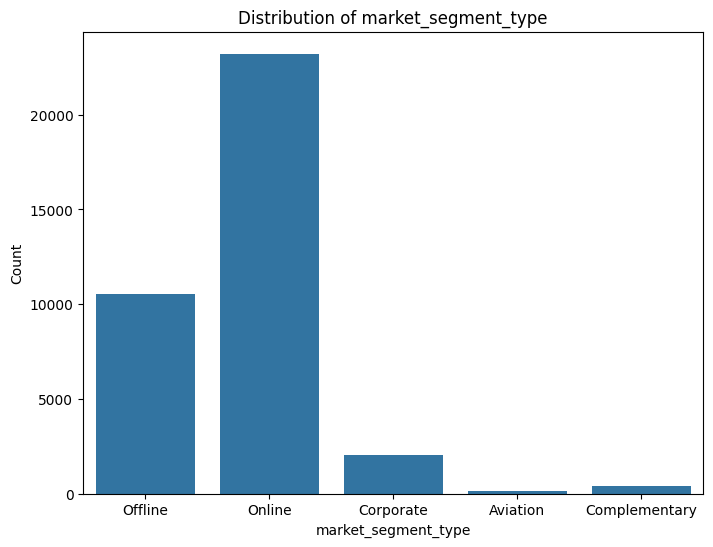

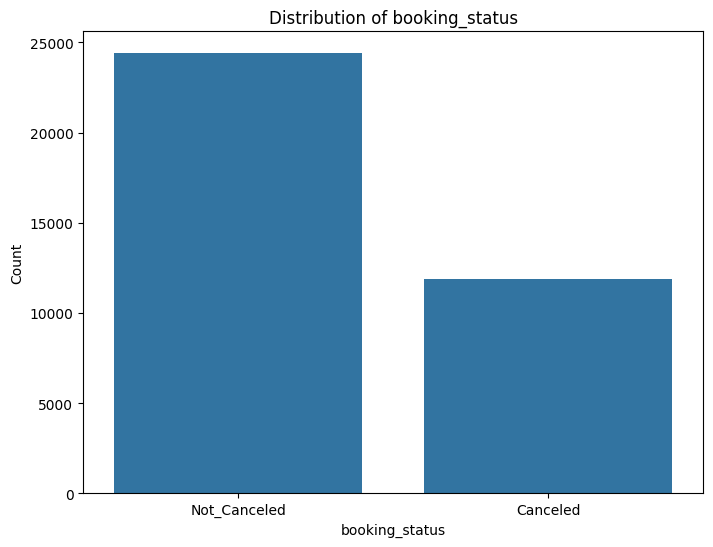

In [160]:
for column in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Observations from univariate analysis of categorical variables:

type_of_meal_plan:
- 'Meal Plan 1' is the most common meal plan booked by customers, followed by 'Not Selected'.
- 'Meal Plan 2' and 'Meal Plan 3' are significantly less frequent.

room_type_reserved:
- 'Room_Type 1' is by far the most frequently reserved room type.
- Other room types ('Room_Type 4', 'Room_Type 6', 'Room_Type 2', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3') are reserved much less often.

market_segment_type:
- The majority of bookings come from the 'Online' market segment, followed by 'Offline'.
- 'Corporate', 'Complementary', and 'Aviation' segments have considerably fewer bookings.

booking_status:
- The number of 'Not_Canceled' bookings is significantly higher than the number of 'Canceled' bookings.

#Bivariate Analysis

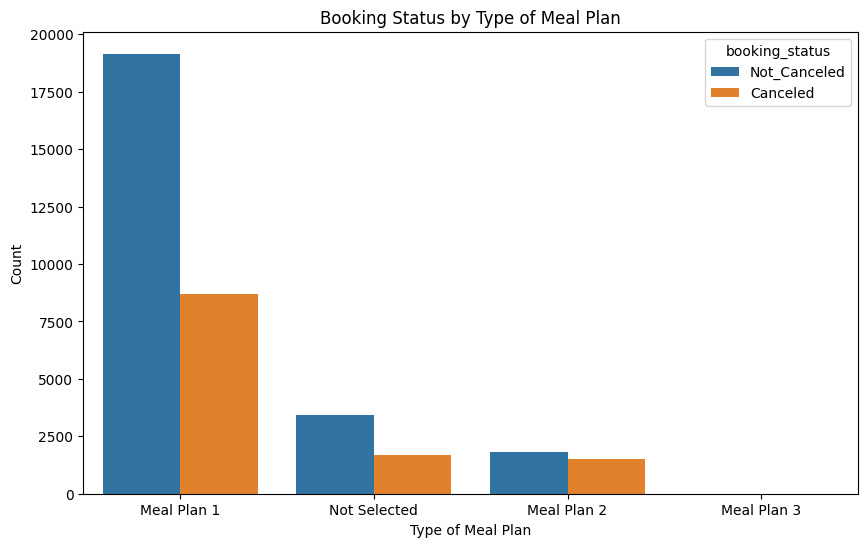

In [161]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status')
plt.title('Booking Status by Type of Meal Plan')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.show()

Booking types not canclled first prefrence is choosing meal plan 1

meal plan 3 choose rarely.

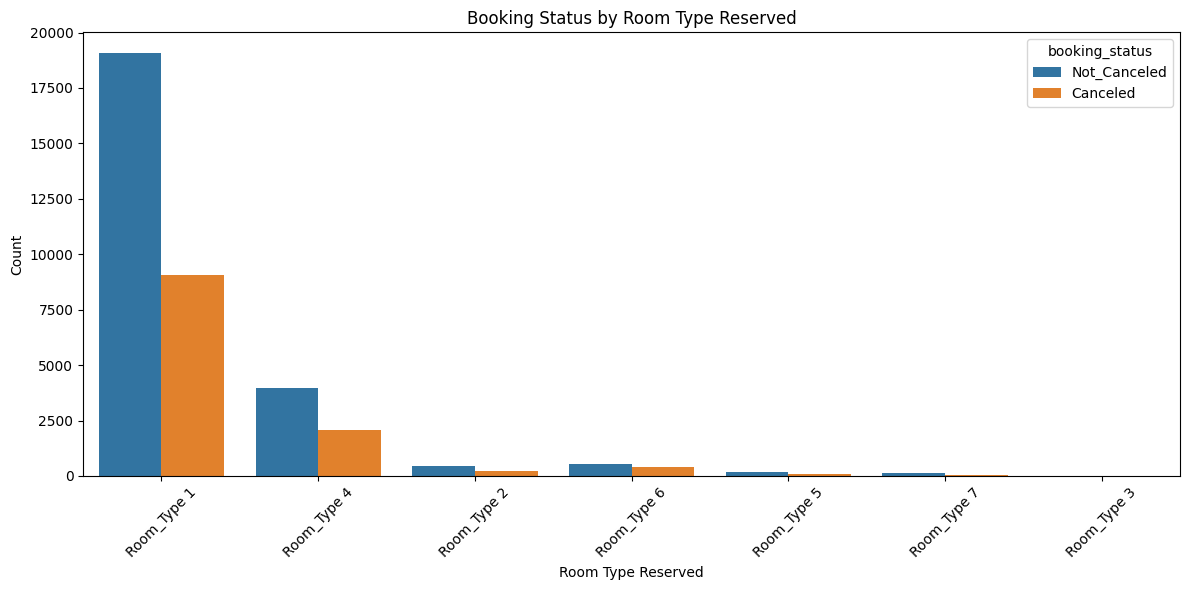

In [162]:
# Relationship between room_type_reserved and booking_status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.title('Booking Status by Room Type Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Room Type 1  is first choice of not canclled user

roome type 3 is rairly choose by any user

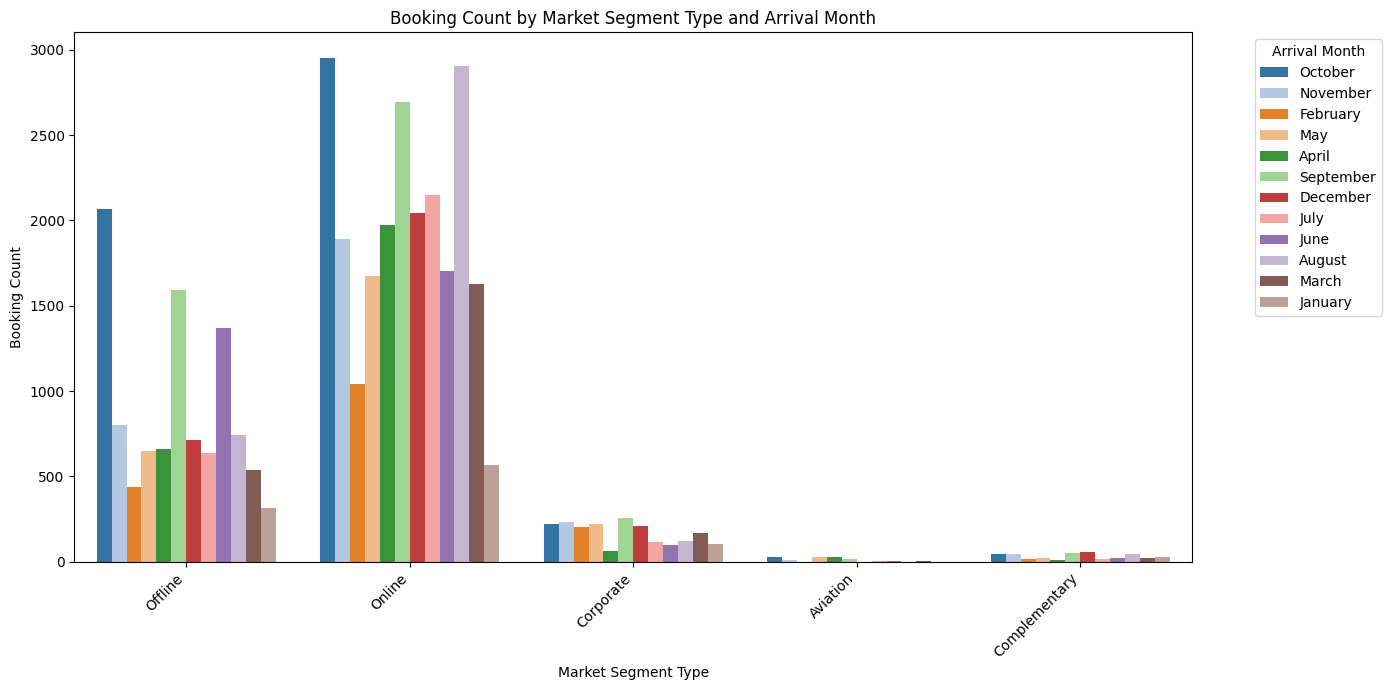

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar # Import the calendar module

# Create a dictionary to map month numbers to names
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# 1️⃣ Map month numbers to names in the 'arrival_month' column
df['arrival_month_name'] = df['arrival_month'].map(month_names)

# 2️⃣ Plot: Count of bookings by market segment for each arrival month
plt.figure(figsize=(14, 7)) # Adjusted figure size for better readability
sns.countplot(
    data=df, # Use the original dataframe
    x='market_segment_type',
    hue='arrival_month_name', # Use month names for hue
    palette='tab20' # Use a different palette with more distinct colors
)

plt.title('Booking Count by Market Segment Type and Arrival Month')
plt.xlabel('Market Segment Type')
plt.ylabel('Booking Count')
plt.xticks(rotation=45, ha='right') # Rotate and align labels for better readability
plt.legend(title='Arrival Month', bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside the plot
plt.tight_layout()
plt.show()

# Optional: Drop the temporary 'arrival_month_name' column if not needed later
# df.drop('arrival_month_name', axis=1, inplace=True)

Most of booking online done on August Month
while when see ofline most booking is on October Month

## Correlation Analysis (Heatmap)

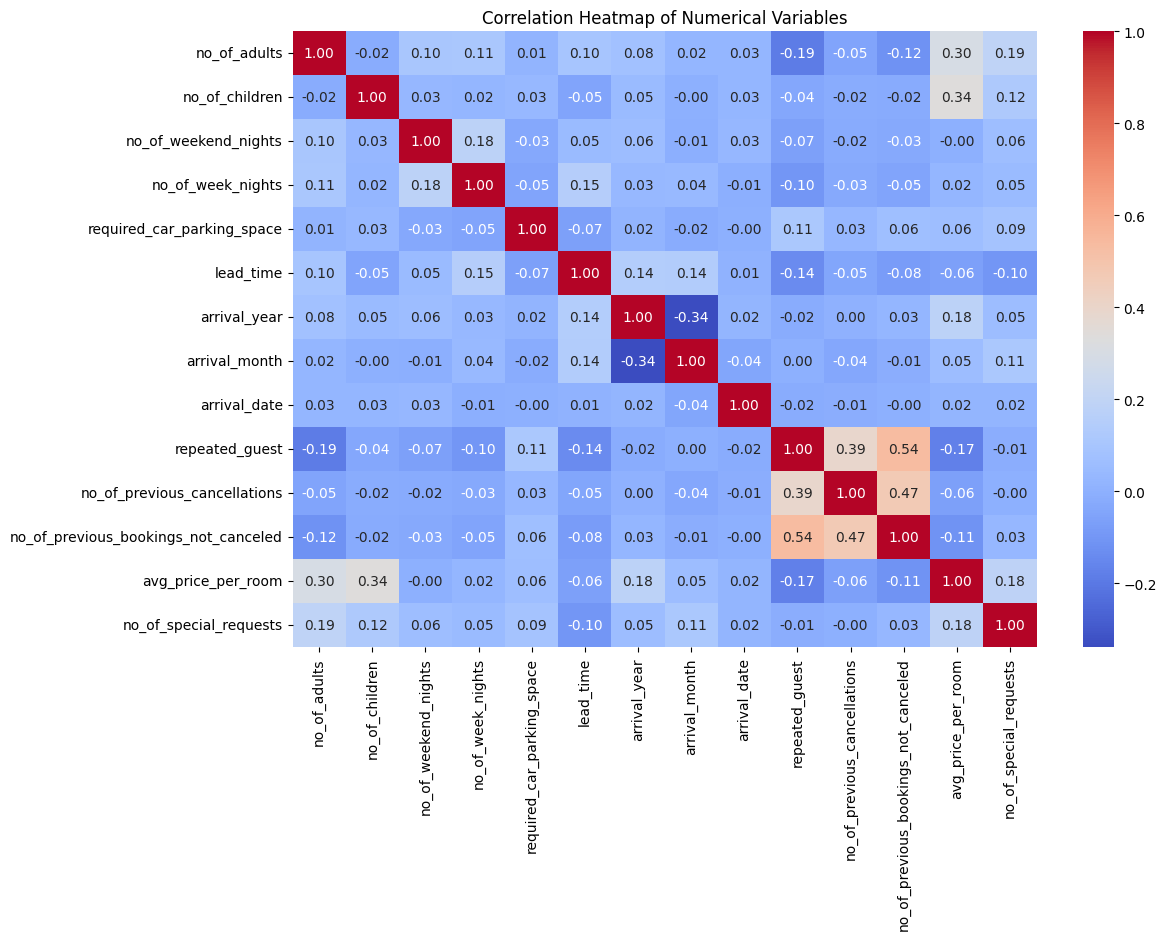

In [164]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Lead Time and Average Price per Room:** There appears to be a weak positive correlation between lead_time and avg_price_per_room. This suggests that bookings made further in advance might have slightly higher average prices, but the relationship is not very strong.

**Number of Previous Bookings Not Canceled and Repeated Guest**: There is a strong positive correlation between no_of_previous_bookings_not_canceled and repeated_guest. This is expected, as a repeated guest is likely to have previous bookings that were not canceled.

## Pairplot of Numerical Variables

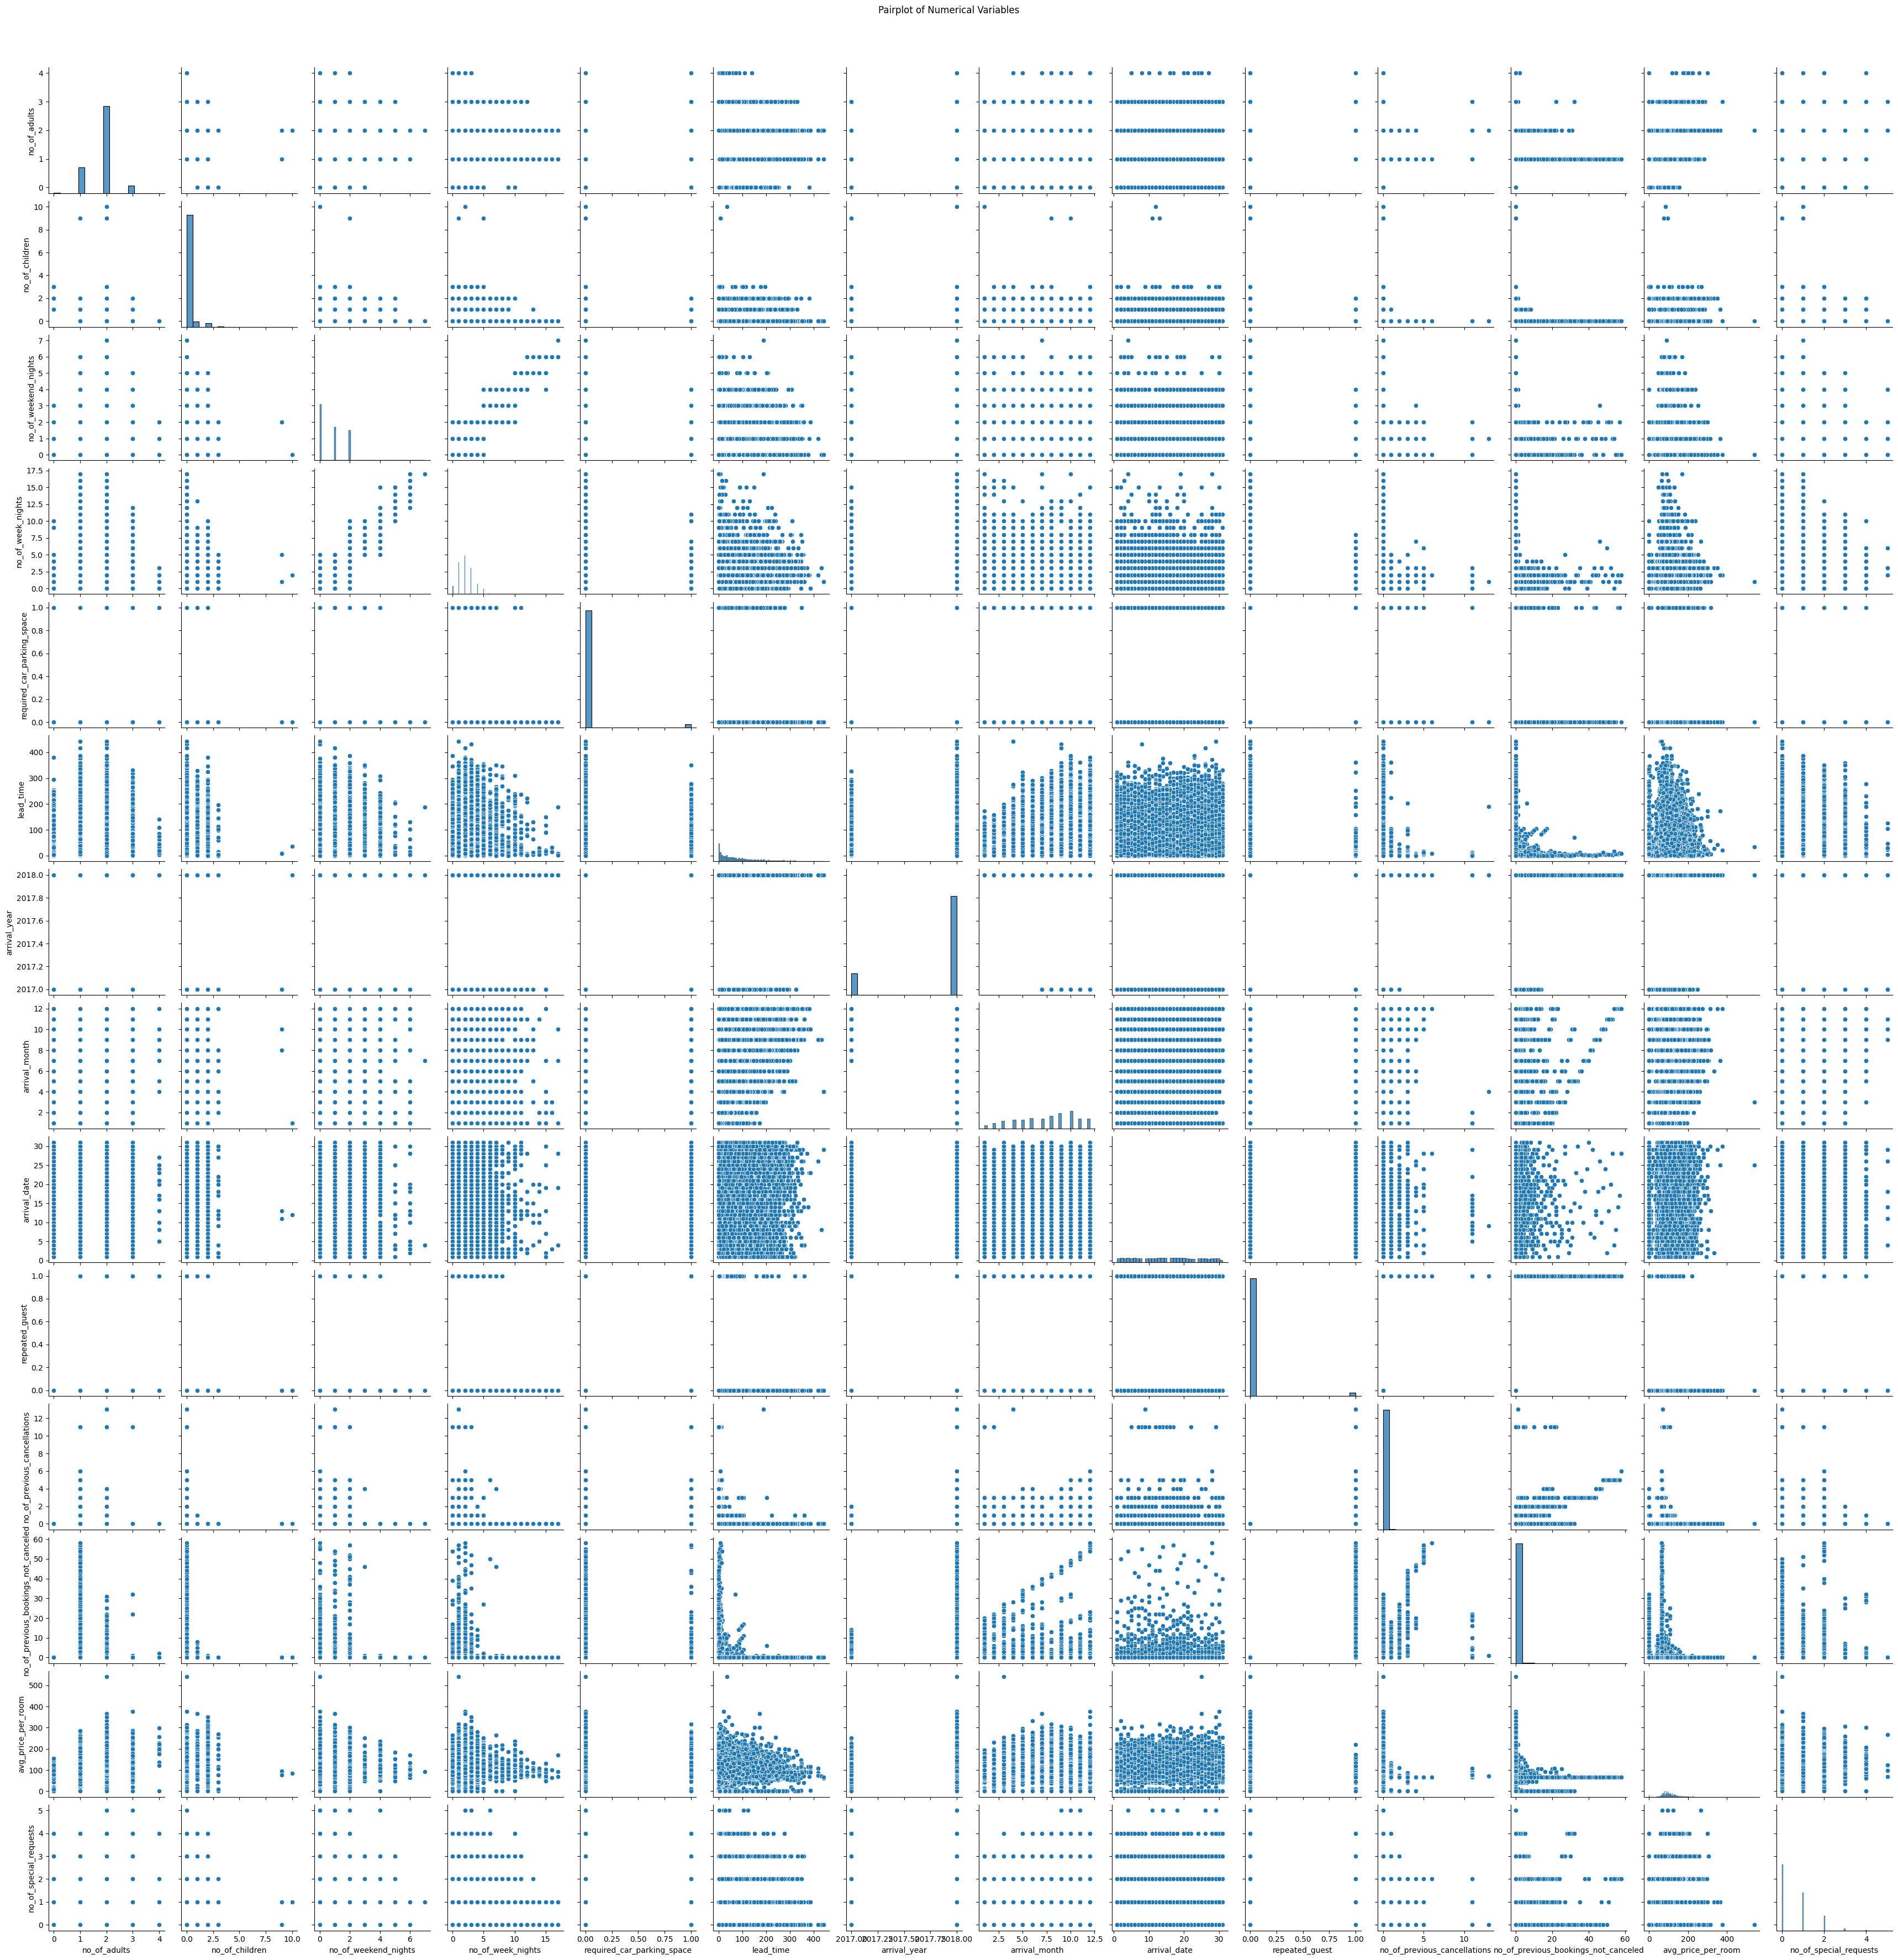

In [165]:

sns.pairplot(numerical_df)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


**Number of Weekend Nights and Number of Week Nights:** There is a weak positive correlation between no_of_weekend_nights and no_of_week_nights, suggesting that longer stays (more weeknights) might also include more weekend nights, but they are not strongly dependent on each other.

**No Strong Linear Correlations Among Most Features:** The heatmap generally shows relatively weak linear correlations between most pairs of numerical variables (values closer to 0). This indicates that many of the numerical features are not strongly linearly related to each other.

**Distribution of Numerical Features:** The pairplot's diagonal histograms confirm the observations from the univariate analysis regarding the skewed distributions of variables like lead_time, avg_price_per_room, no_of_children, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, and no_of_special_requests. This skewness might need to be addressed during feature engineering for certain models.


In [166]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


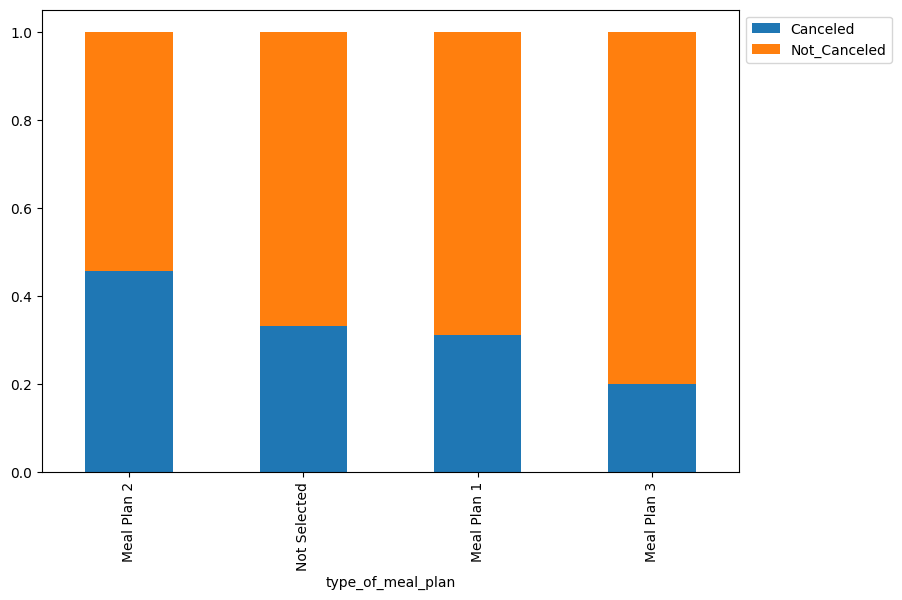

In [167]:
stacked_barplot(df, 'type_of_meal_plan', 'booking_status')

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


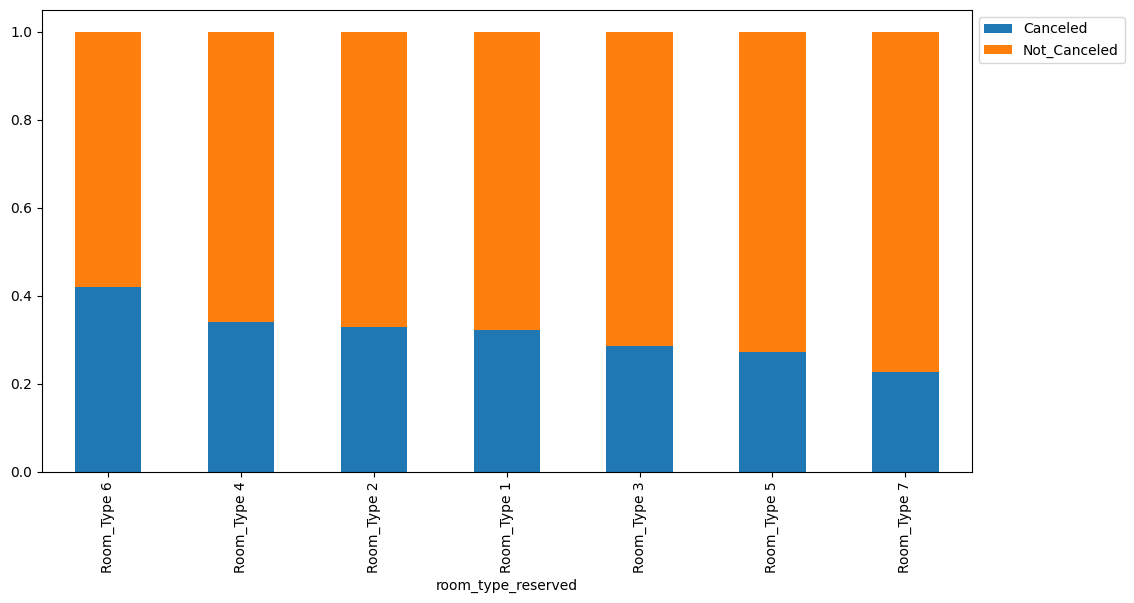

In [168]:
stacked_barplot(df, 'room_type_reserved', 'booking_status')

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


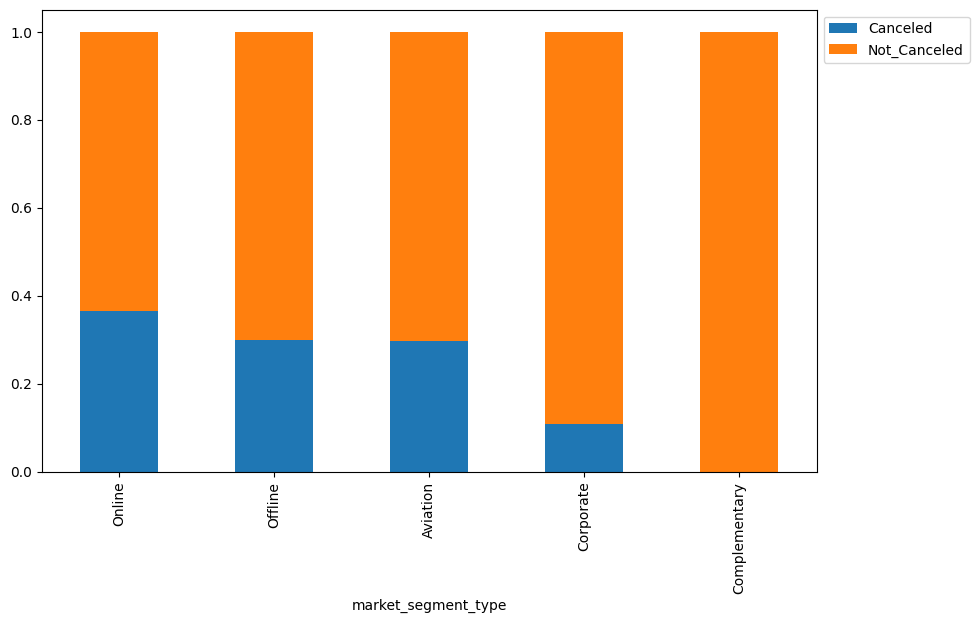

In [169]:
stacked_barplot(df, 'market_segment_type', 'booking_status')

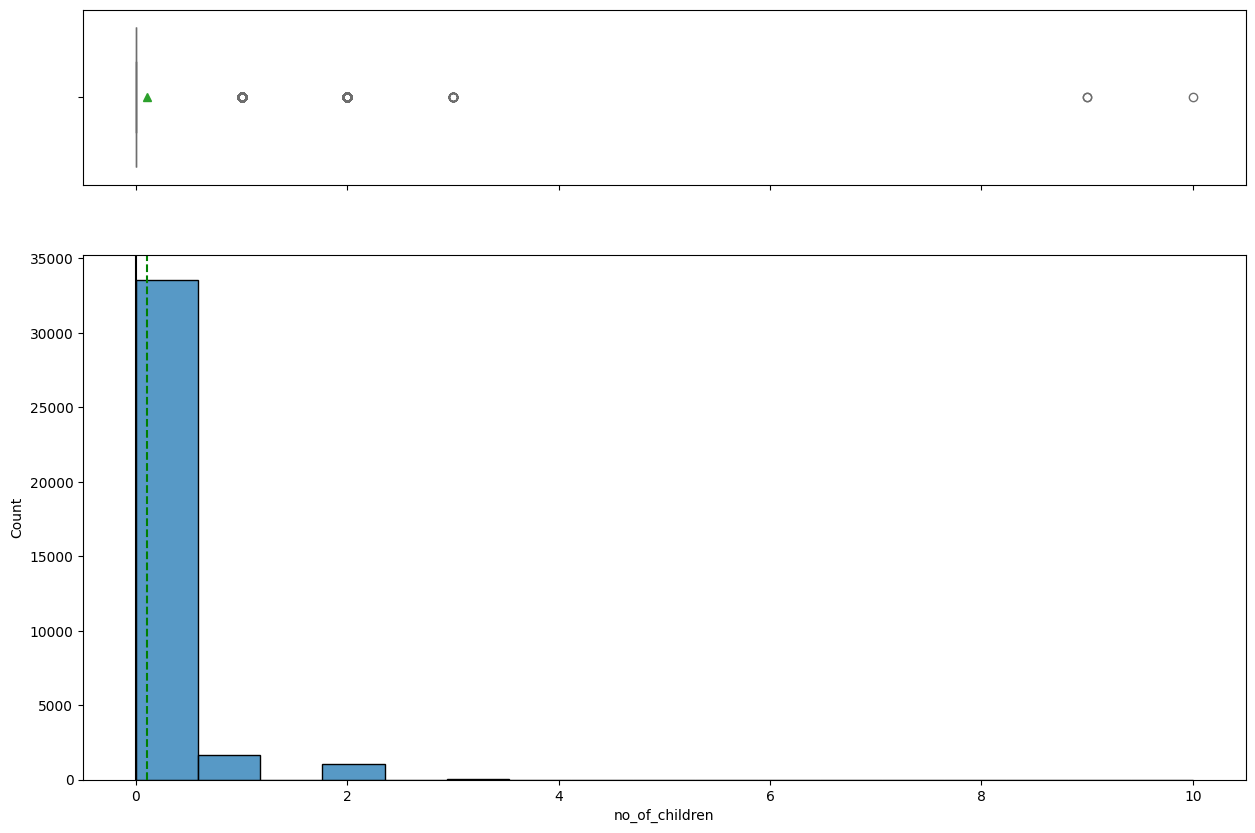

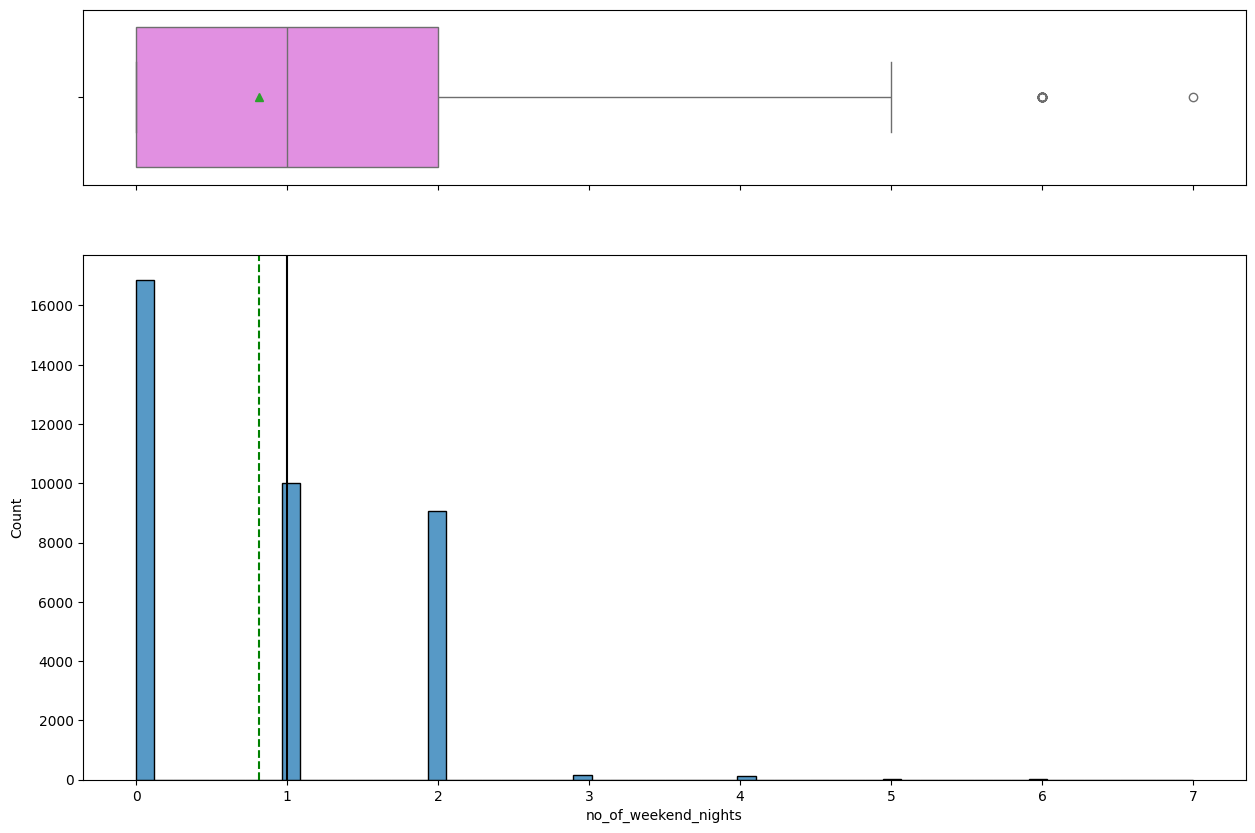

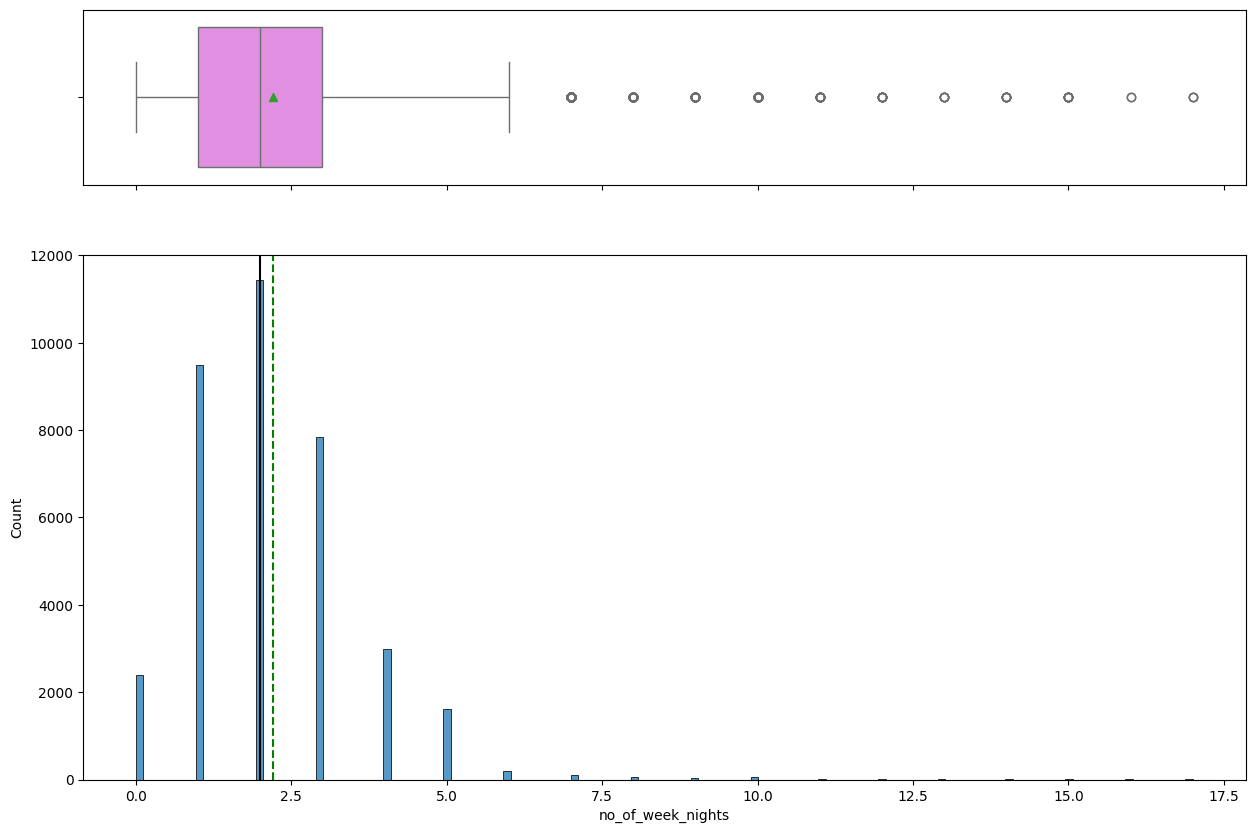

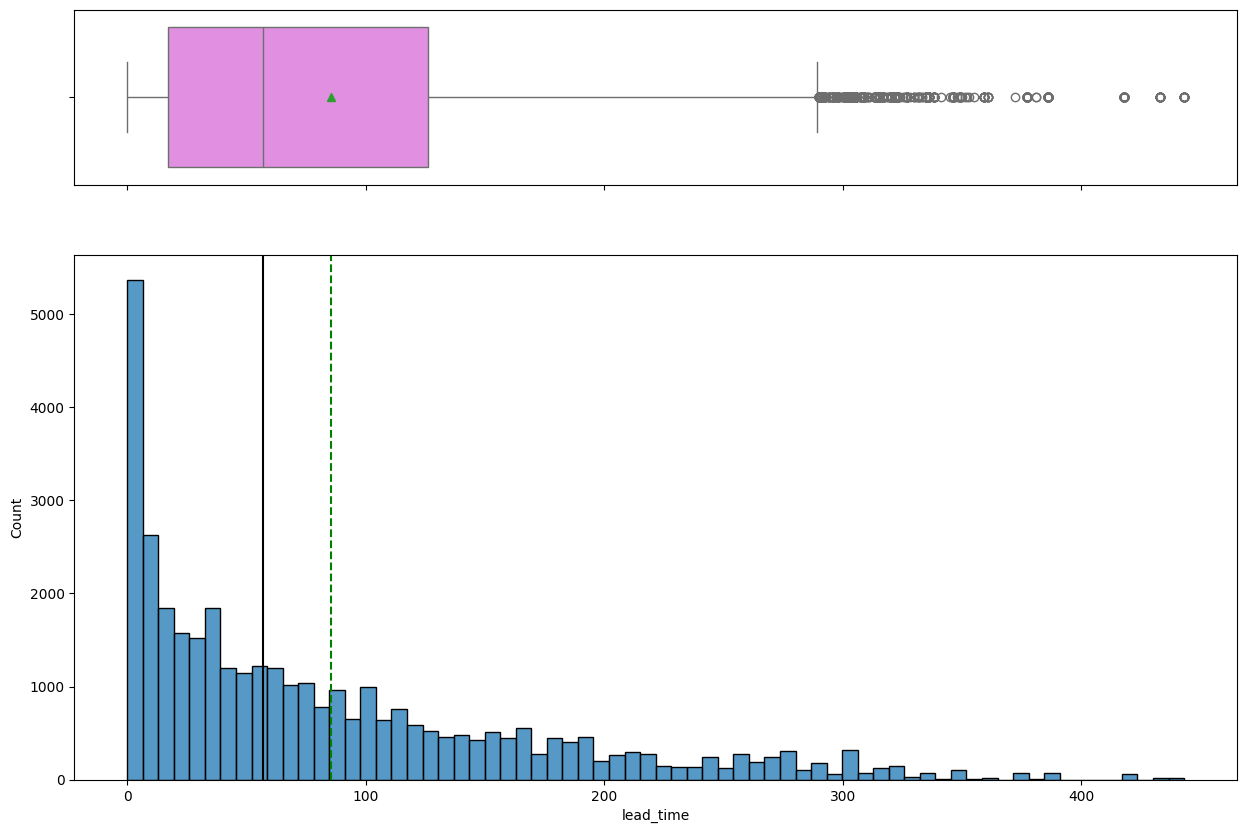

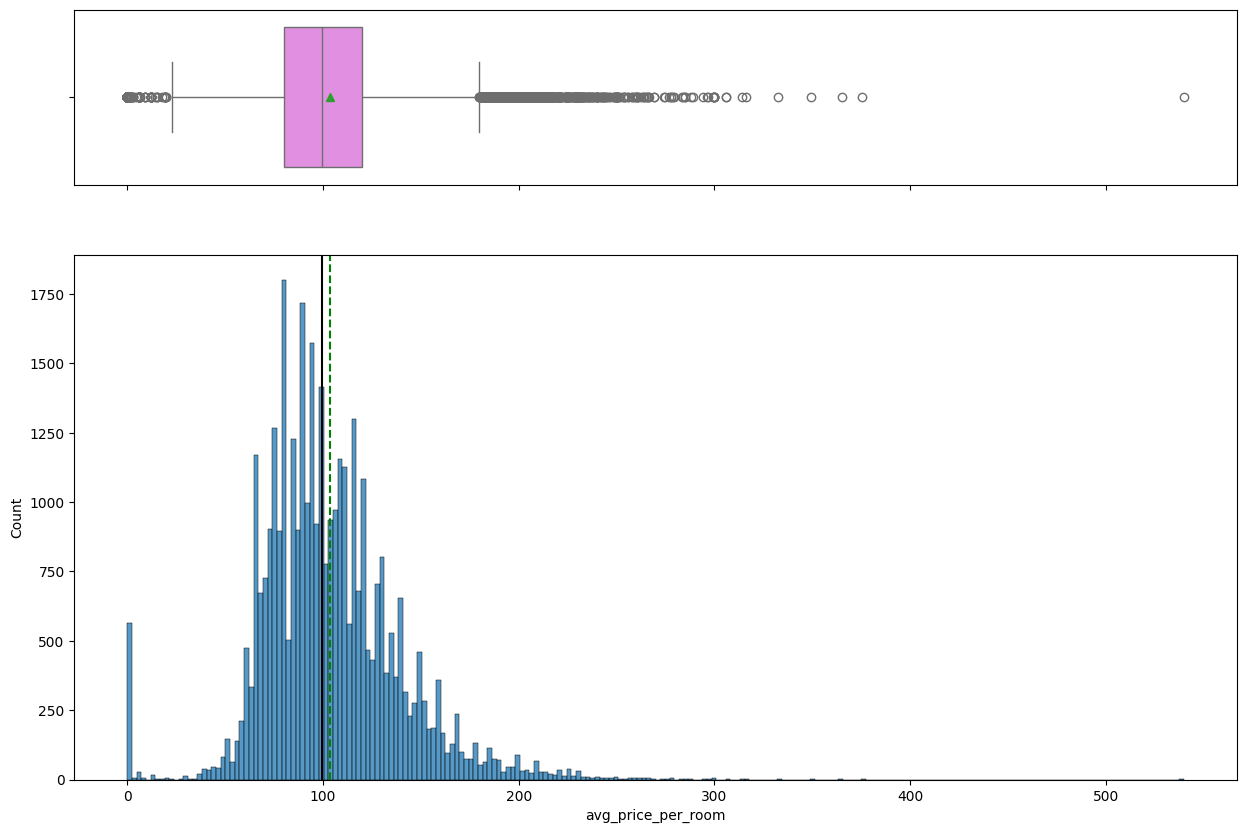

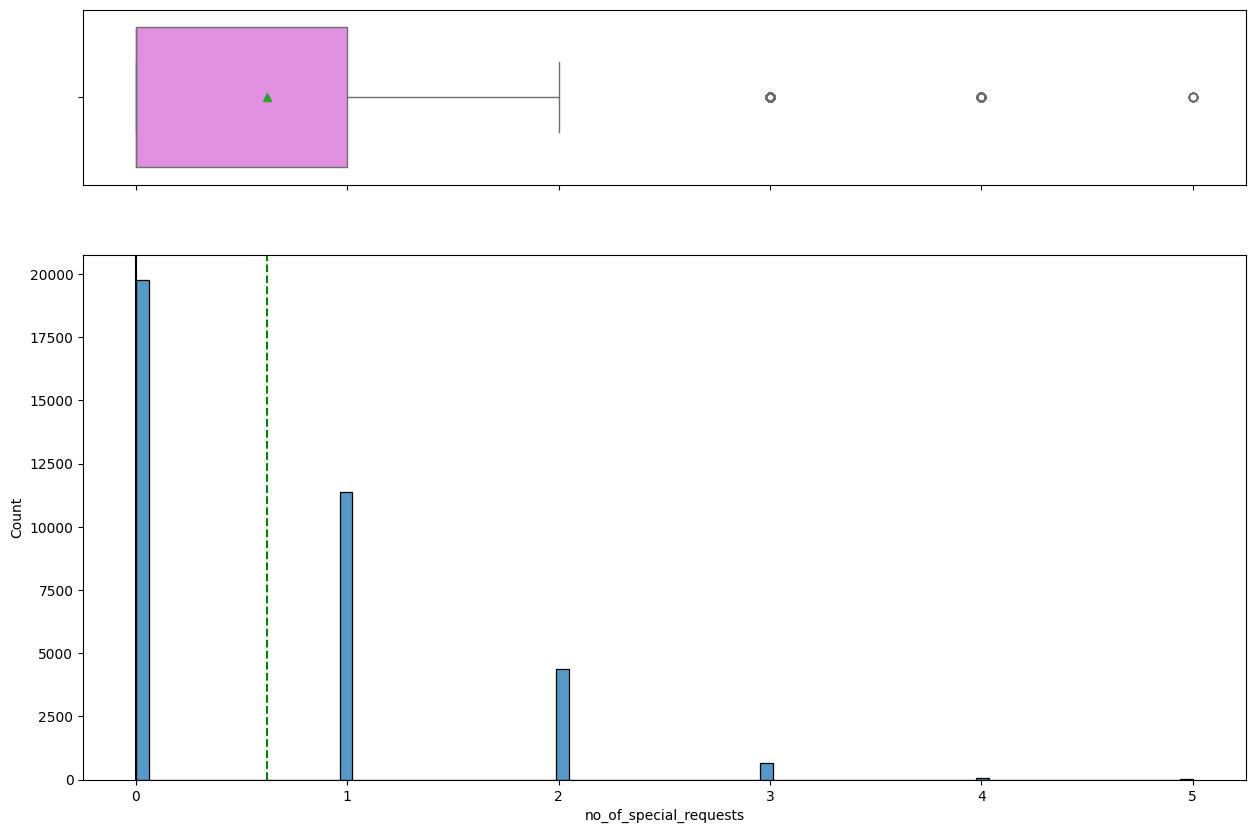

In [170]:
histogram_boxplot(df, "no_of_children")
histogram_boxplot(df, "no_of_weekend_nights")
histogram_boxplot(df, "no_of_week_nights")
histogram_boxplot(df, "lead_time")
histogram_boxplot(df, "avg_price_per_room")
histogram_boxplot(df, "no_of_special_requests")

## Identify outlier variables

### Subtask:
Based on the box plots generated in the univariate analysis, identify the numerical variables that exhibit significant outliers.


**Reasoning**:
Based on the generated box plots, I will visually inspect each plot to identify variables with significant outliers (points beyond the whiskers).



Variables with potential outliers based on box plots:
Checking variable: no_of_children
Checking variable: no_of_weekend_nights
Checking variable: no_of_week_nights
Checking variable: lead_time
Checking variable: avg_price_per_room
Checking variable: no_of_special_requests


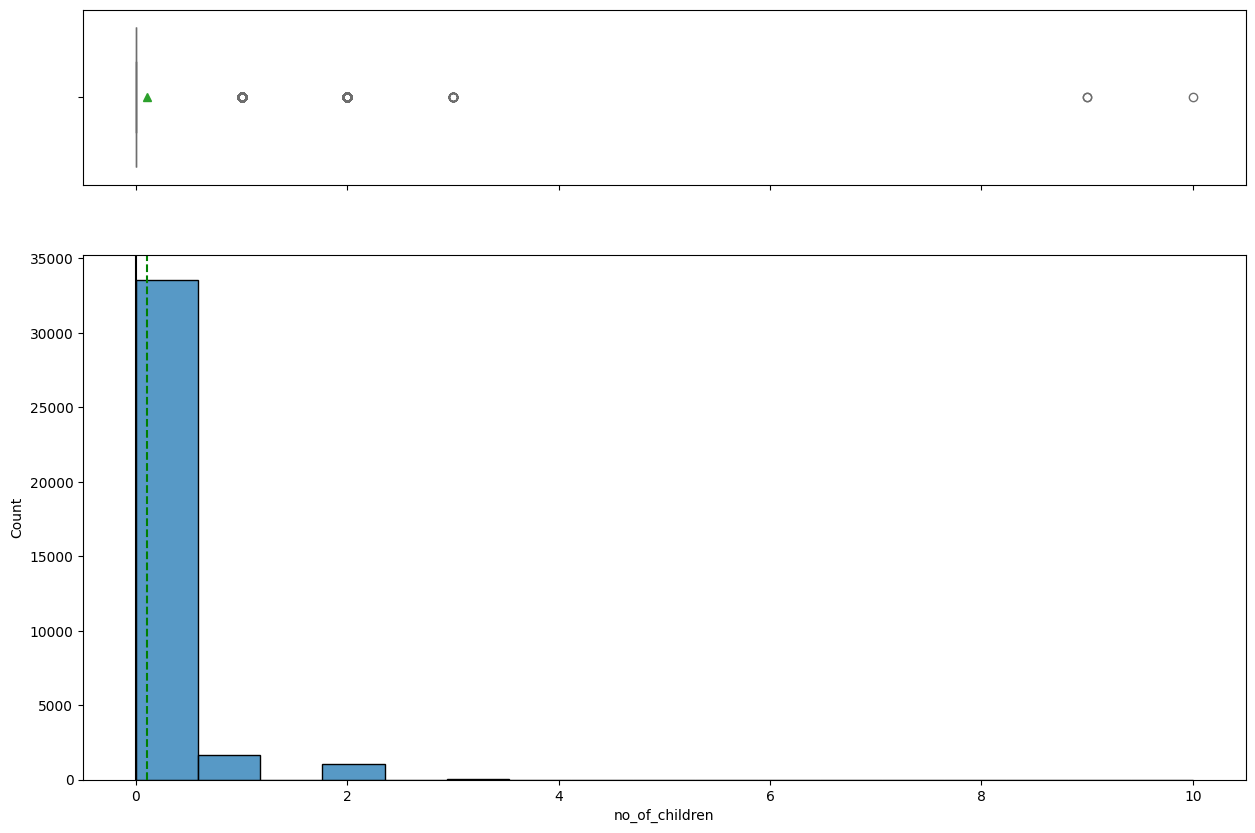

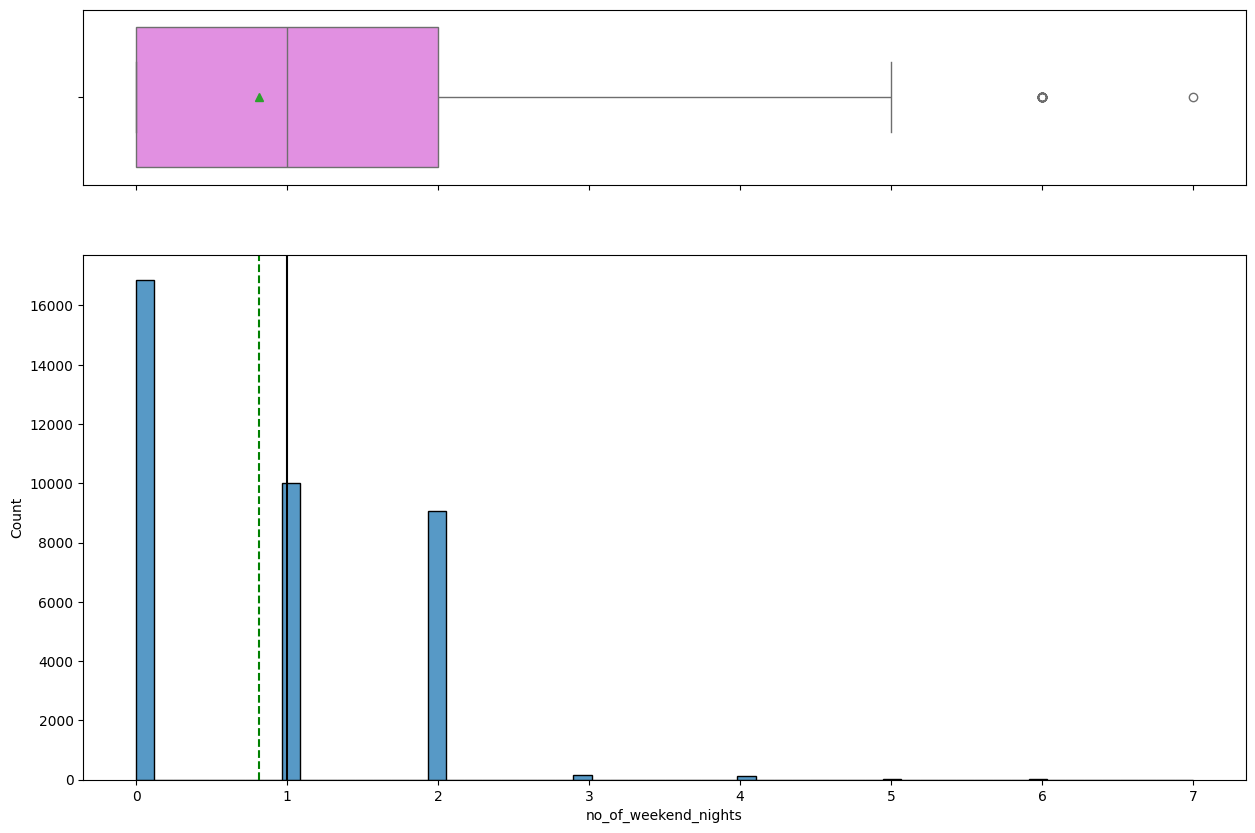

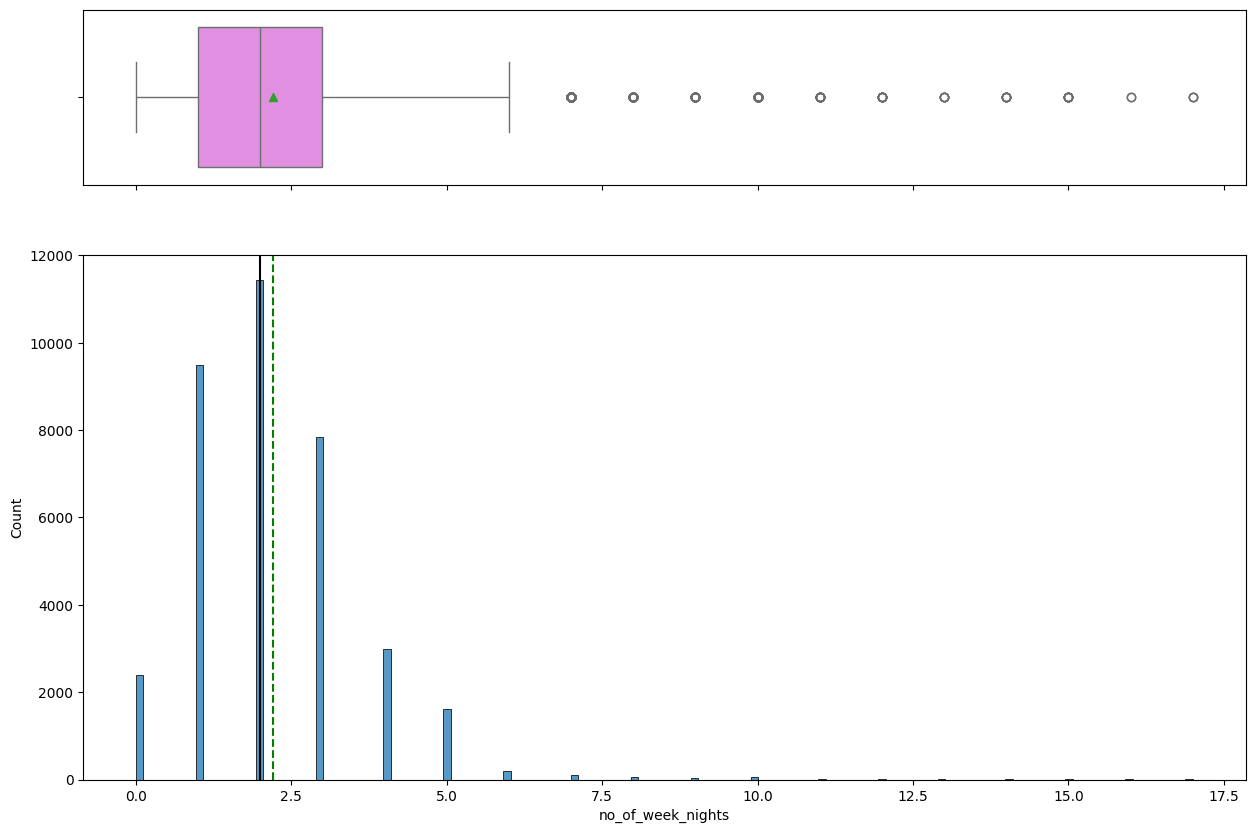

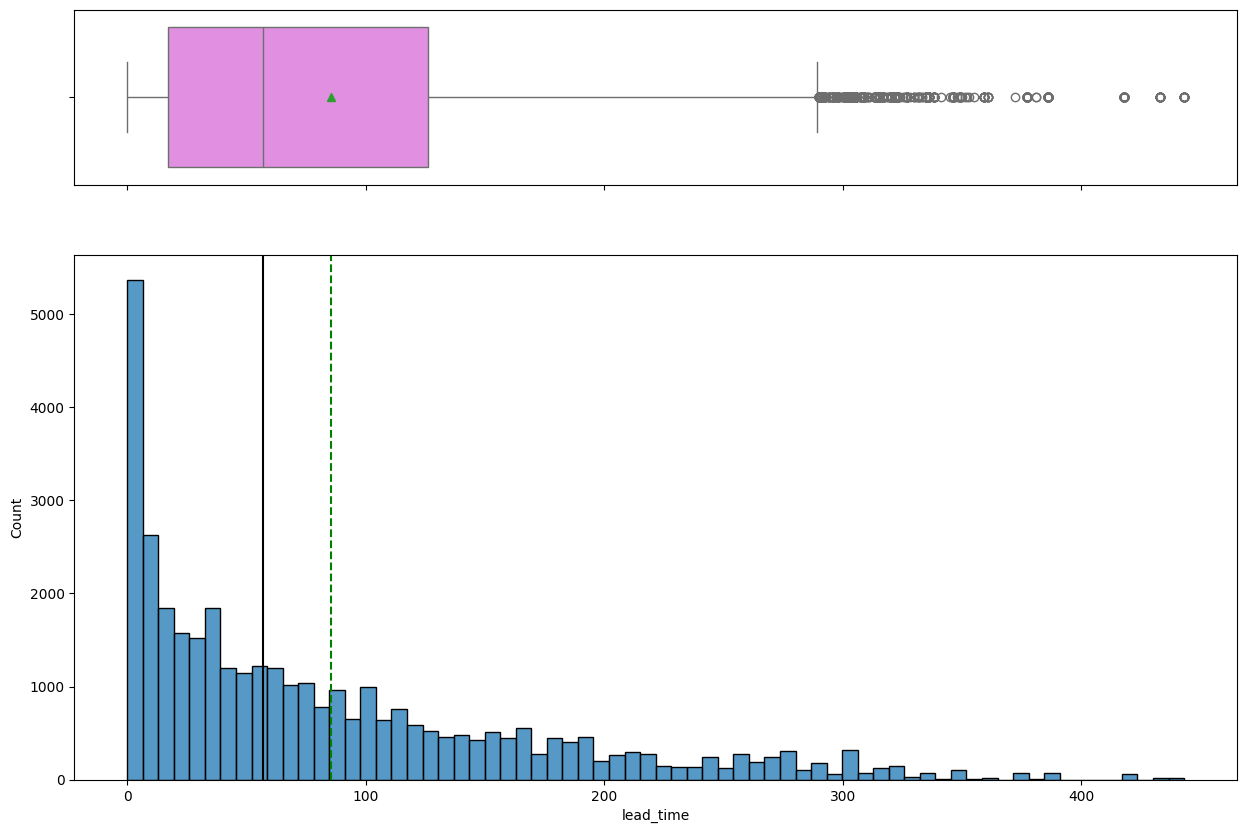

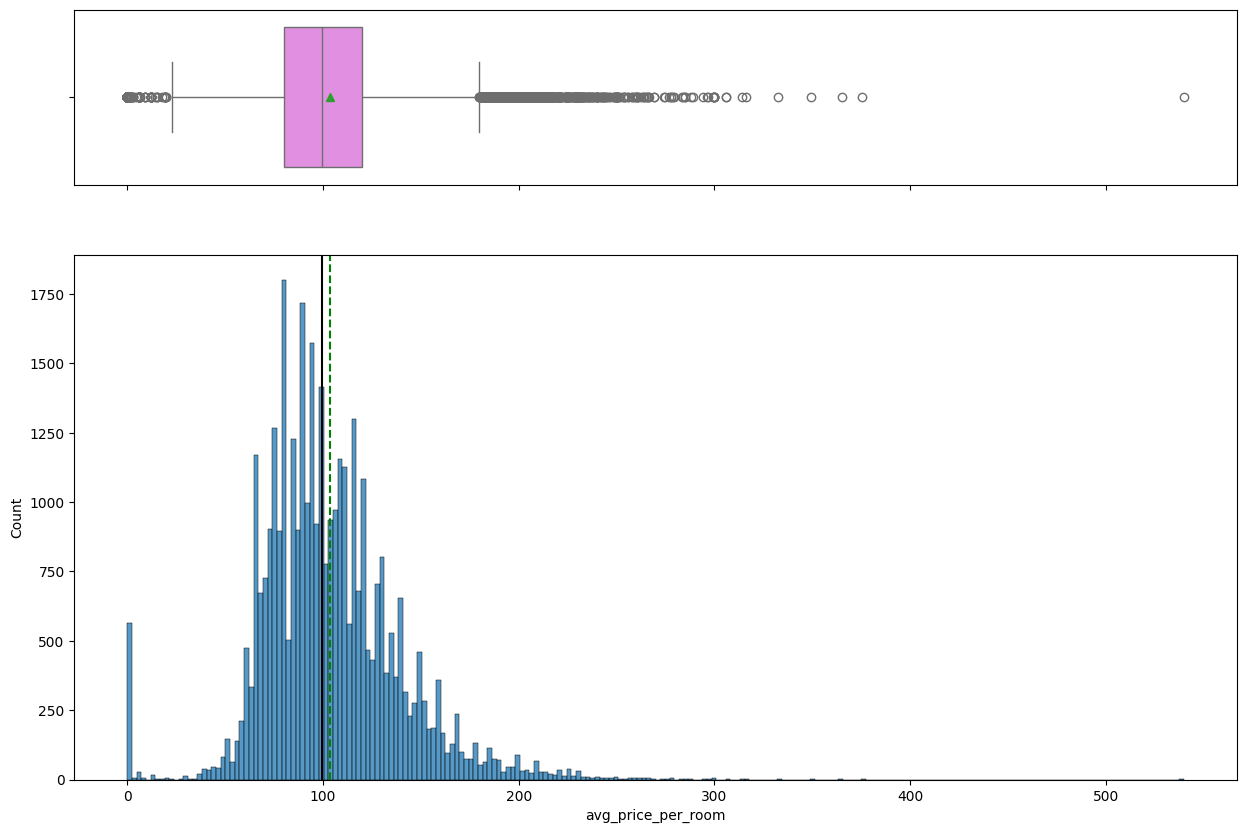

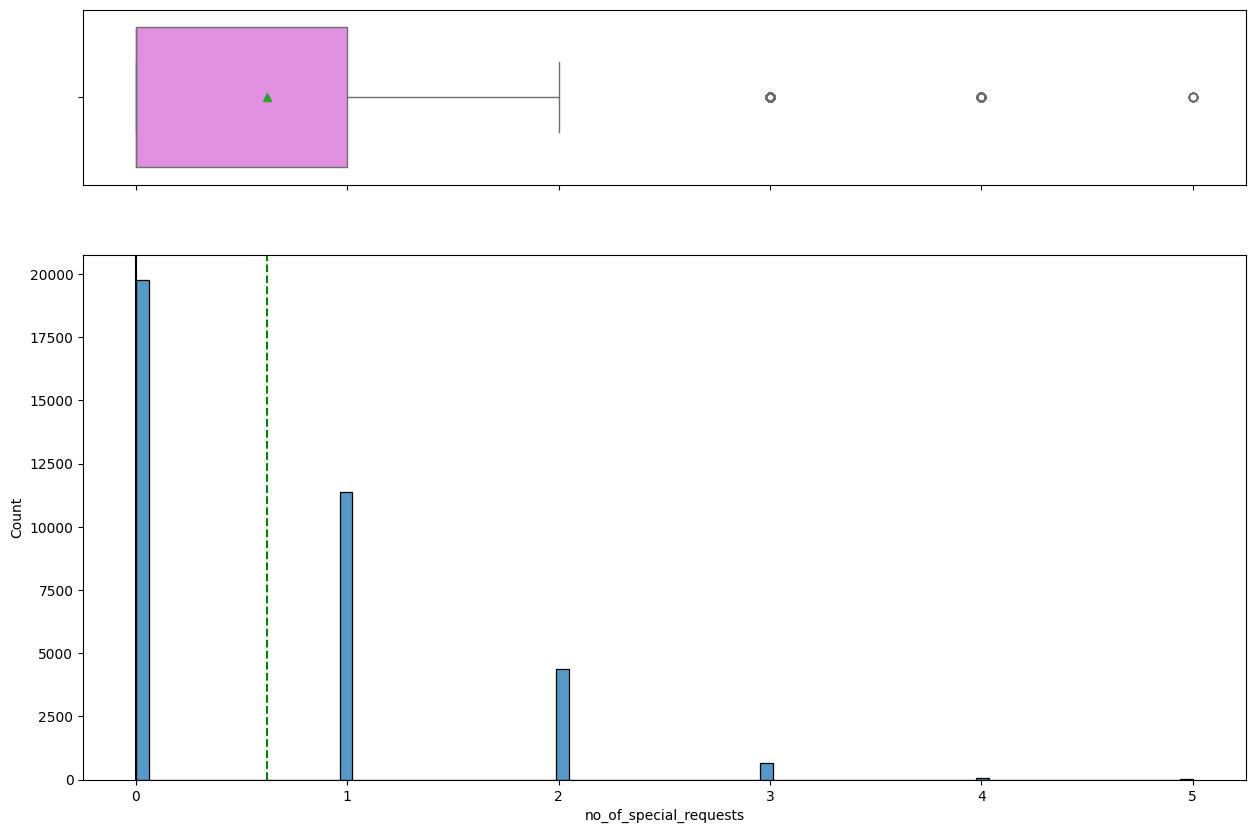

In [171]:
outlier_variables = [
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'lead_time',
    'avg_price_per_room',
    'no_of_special_requests'
]

print("Variables with potential outliers based on box plots:")
for var in outlier_variables:
    # Re-displaying the boxplots for visual inspection
    histogram_boxplot(df, var)
    print(f"Checking variable: {var}")


#Data Preprocessing

##Treating Outlire



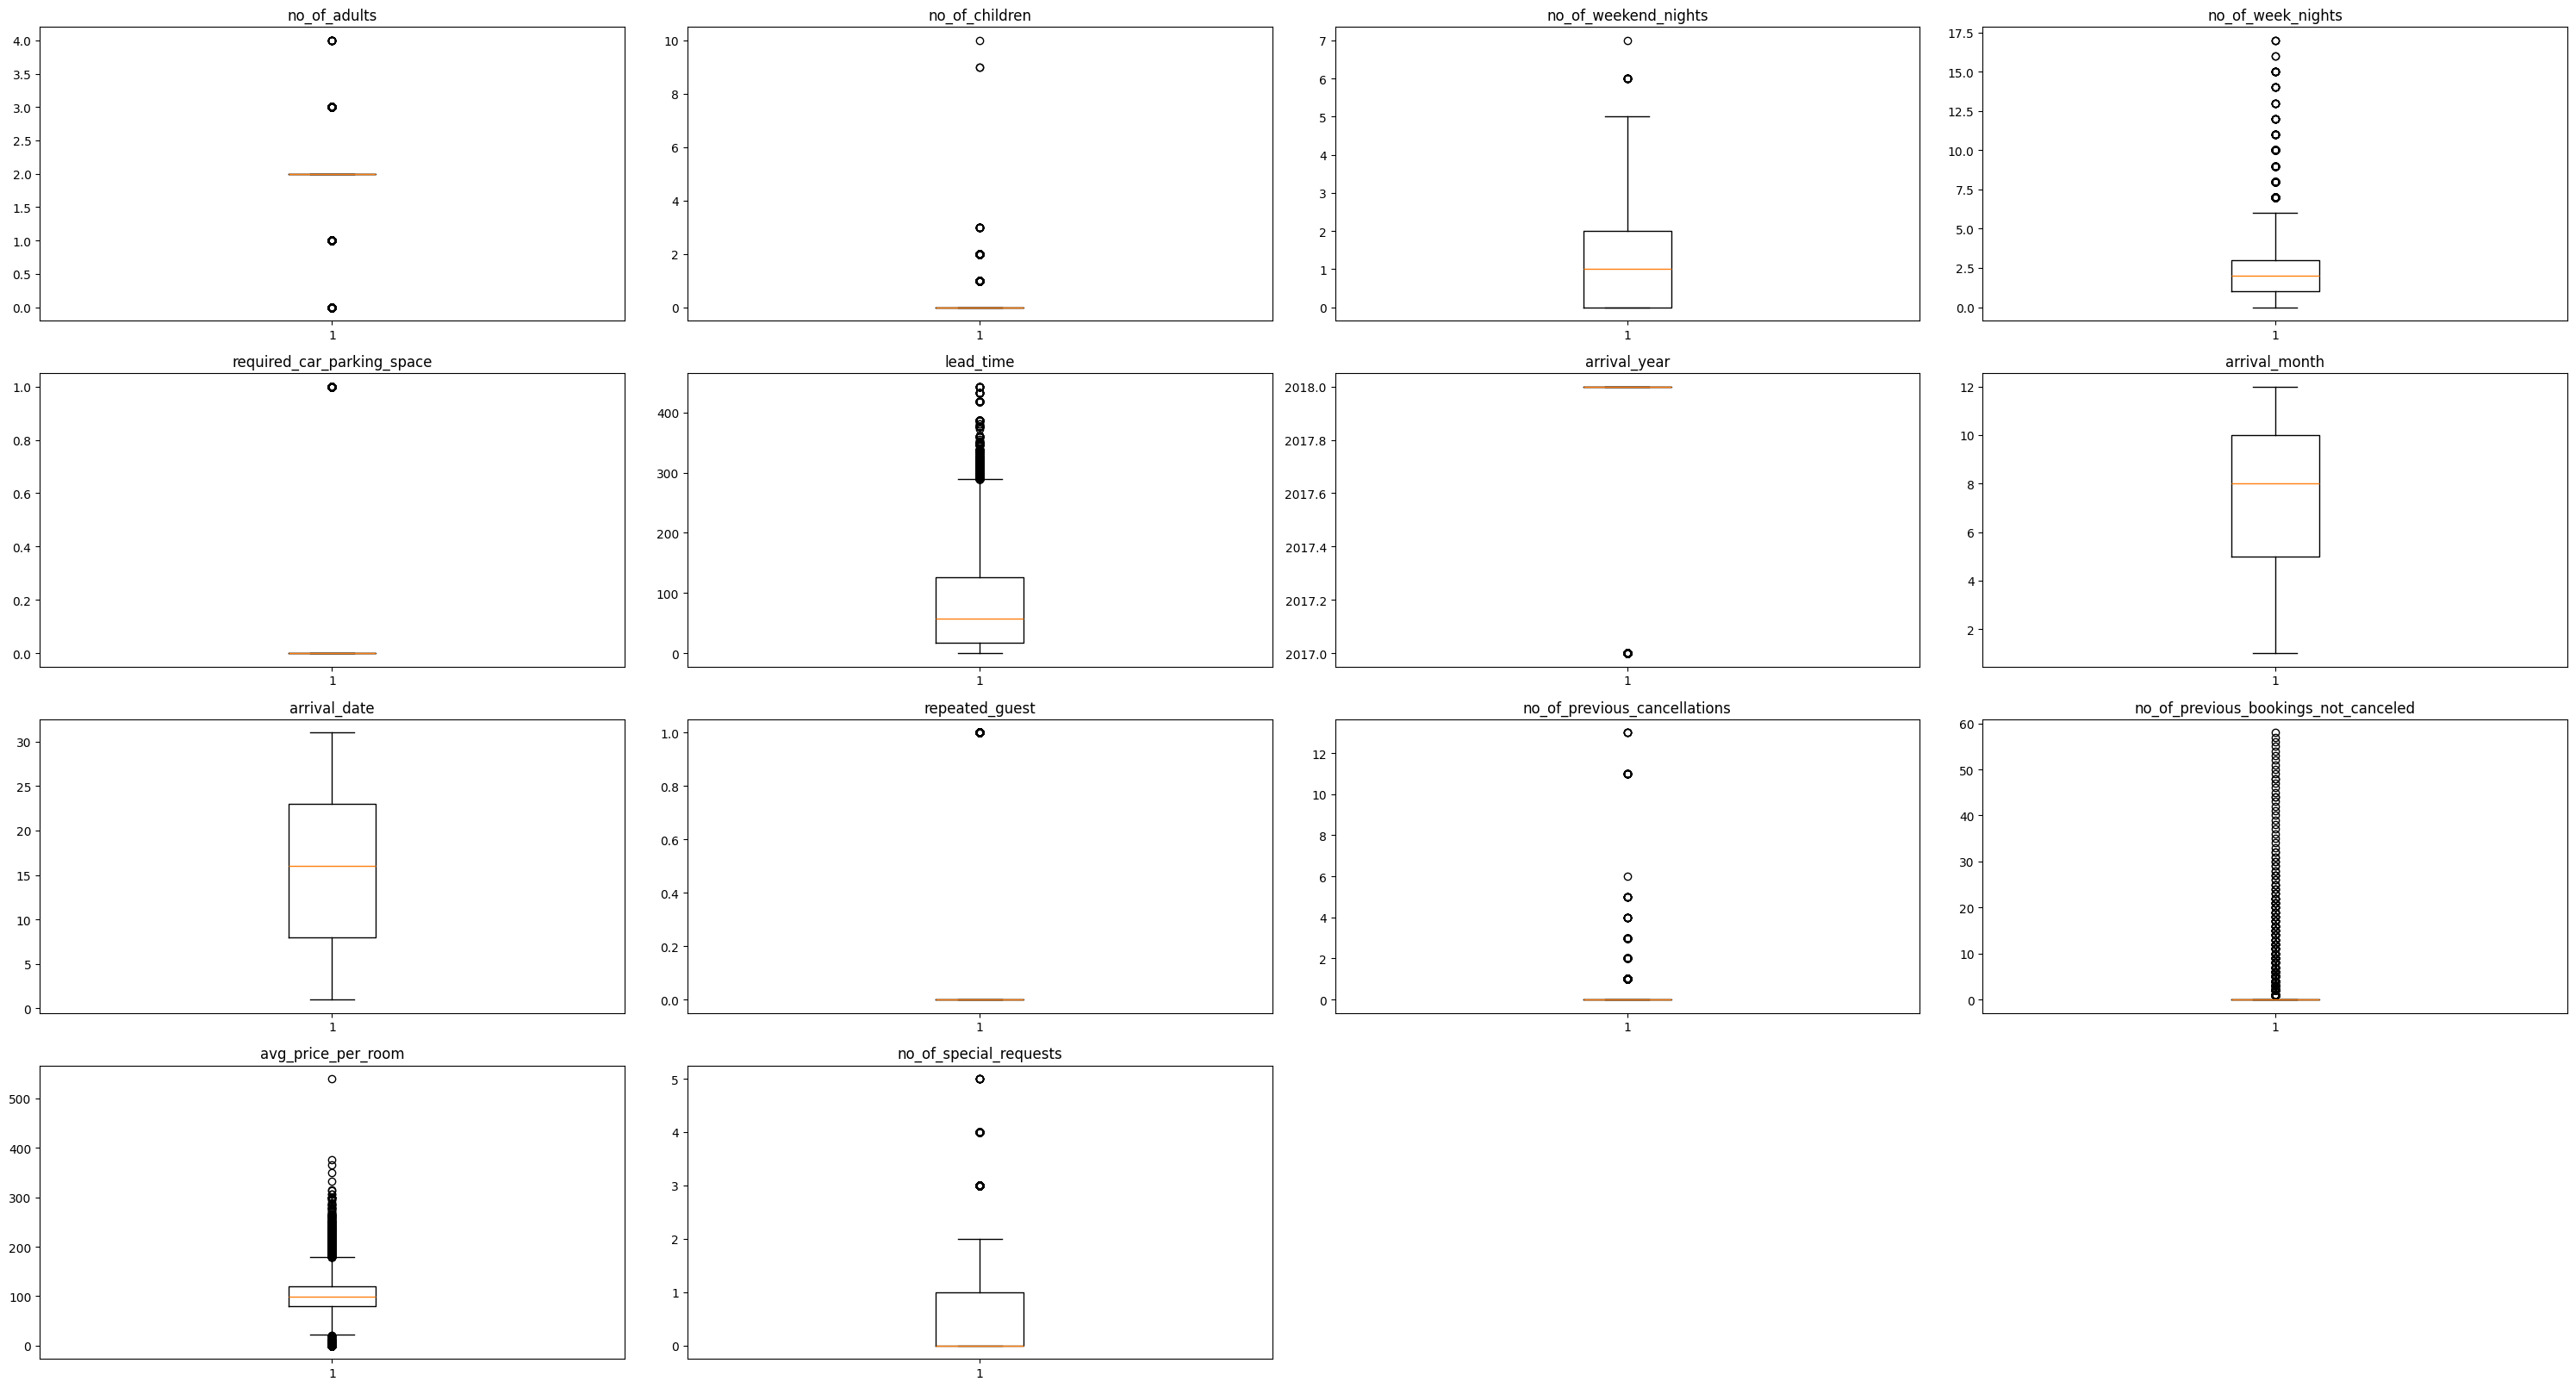

In [172]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))


for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Although outlires Exist , we Will keep  them as they may hava a valuable input


# Data Preparation

In [173]:
X = df.drop("booking_status", axis=1)
Y = df["booking_status"]

X = X.drop('arrival_month', axis=1)

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [174]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 37)
Shape of test set :  (10883, 37)
Percentage of classes in training set:
booking_status
Not_Canceled    0.670644
Canceled        0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
Not_Canceled    0.676376
Canceled        0.323624
Name: proportion, dtype: float64


# Building the model

In [175]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [176]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


#Logistic Regression (with statsmodels library)

In [177]:
X = df.drop("booking_status", axis=1)
Y = df["booking_status"]


X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [178]:

y_train = y_train.apply(lambda x: 1 if x == 'Canceled' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'Canceled' else 0)

logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25354
Method:                           MLE   Df Model:                           37
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3511
Time:                        16:03:26   Log-Likelihood:                -10418.
converged:                      False   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -901.1400        nan        nan        nan         nan         nan
no_of_adults                             0.1513      

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lack of Convergence: The most important observation is that the model did not converge (converged: False). This means the optimization algorithm couldn't find a stable set of coefficients, and the results might not be reliable. This needs to be addressed.

Pseudo R-squared: The model has a Pseudo R-squared of 0.3345, which suggests that the predictors explain some portion of the variation in booking status compared to a model with no predictors.

Significant Model: The LLR p-value of 0.000 suggests that the model as a whole is statistically significant, meaning at least one predictor is related to the booking status. However, due to the lack of convergence, we should be cautious about interpreting individual predictor effects at this point.

In [179]:
X_train

const  no_of_adults  no_of_children  no_of_weekend_nights  \
6360     1.0           2.0             0.0                   2.0   
19068    1.0           2.0             0.0                   0.0   
35239    1.0           1.0             0.0                   2.0   
24003    1.0           2.0             0.0                   0.0   
32829    1.0           2.0             0.0                   2.0   
...      ...           ...             ...                   ...   
20757    1.0           1.0             0.0                   2.0   
32103    1.0           2.0             0.0                   0.0   
30403    1.0           3.0             0.0                   0.0   
21243    1.0           1.0             0.0                   0.0   
2732     1.0           2.0             0.0                   0.0   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
6360                 1.0                         0.0       89.0        2018.0   
19068                2.0                         0.0      308.0        2018.0   
35239                1.0                         0.0       20.0        2018.0   
24003                5.0                         0.0      230.0        2018.0   
32829                2.0                         0.0       80.0        2018.0   
...                  ...                         ...        ...           ...   
20757                5.0                         0.0       34.0        2018.0   
32103                2.0                         0.0      346.0        2018.0   
30403                4.0                         0.0      175.0        2018.0   
21243                3.0                         0.0        5.0        2017.0   
2732                 1.0                         0.0       43.0        2018.0   

       arrival_month  arrival_date  repeated_guest  \
6360             4.0           9.0             0.0   
19068           11.0          25.0             0.0   
35239            3.0           6.0             0.0   
24003            9.0           6.0             0.0   
32829            9.0          25.0             0.0   
...              ...           ...             ...   
20757           11.0          14.0             0.0   
32103            9.0          13.0             0.0   
30403            8.0           2.0             0.0   
21243           12.0           1.0             0.0   
2732             6.0          18.0             0.0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
6360                            0.0                                   0.0   
19068                           0.0                                   0.0   
35239                           0.0                                   0.0   
24003                           0.0                                   0.0   
32829                           0.0                                   0.0   
...                             ...                                   ...   
20757                           0.0                                   0.0   
32103                           0.0                                   0.0   
30403                           0.0                                   0.0   
21243                           0.0                                   0.0   
2732                            0.0                                   0.0   

       avg_price_per_room  no_of_special_requests  \
6360                79.50                     1.0   
19068               52.00                     0.0   
35239               85.00                     0.0   
24003              137.00                     1.0   
32829              135.90                     0.0   
...                   ...                     ...   
20757               74.80                     2.0   
32103              115.00                     1.0   
30403              130.05                     1.0   
21243               64.80                     0.0   
2732               109.49                     1.0   

      

#Droping the Element which p value is grate then 0.05

In [180]:
X_train1 = X_train.drop(["no_of_adults","arrival_date"], axis=1,)

In [181]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
#print(lg1.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [182]:
X_train2 = X_train1.drop(["no_of_previous_bookings_not_canceled","no_of_previous_cancellations"], axis=1)

In [183]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
#print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.410946
         Iterations 26


There are some dummy variable which valuee is grater then 0.05  it doe't put any major impect but for suerity remove the highest value

Confusion Matrix for Training Data:


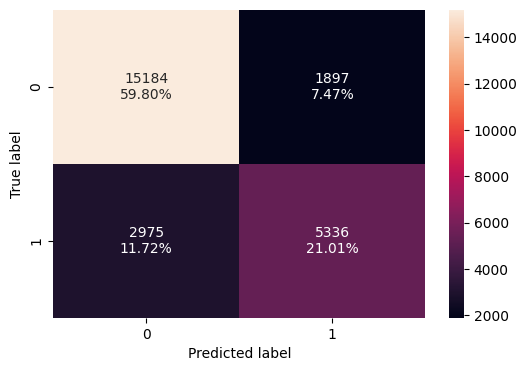


Confusion Matrix for Test Data:


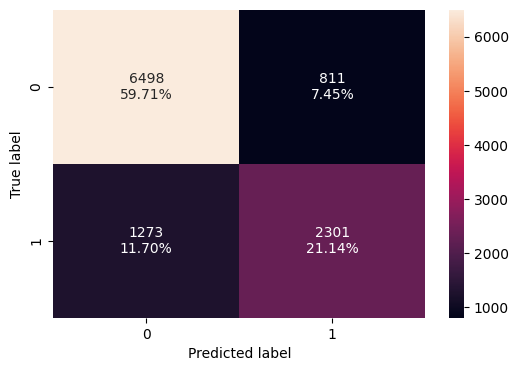

In [184]:
# Confusion matrix on the training data
print("Confusion Matrix for Training Data:")
confusion_matrix_statsmodels(lg2, X_train2, y_train)
plt.show()

# Confusion matrix on the test data
print("\nConfusion Matrix for Test Data:")
# Drop the columns that were dropped from X_train2 from X_test as well
X_test2 = X_test.drop(["no_of_adults","arrival_date", "no_of_previous_bookings_not_canceled","no_of_previous_cancellations"], axis=1)
confusion_matrix_statsmodels(lg2, X_test2, y_test)
plt.show()

In [185]:
# Model performance on the training data
print("Model Performance on Training Data:")
display(model_performance_classification_statsmodels(lg2, X_train2, y_train))

# Model performance on the test data
print("\nModel Performance on Test Data:")
display(model_performance_classification_statsmodels(lg2, X_test2, y_test))

Model Performance on Training Data:


Accuracy    Recall  Precision        F1
0  0.808129  0.642041    0.73773  0.686567


Model Performance on Test Data:


Accuracy    Recall  Precision        F1
0  0.808509  0.643816   0.739396  0.688304

In [186]:
X_train3 = X_train2.drop("market_segment_type_Complementary", axis=1)
X_test3 = X_test2.drop("market_segment_type_Complementary", axis=1)

logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25359
Method:                           MLE   Df Model:                           32
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3493
Time:                        16:03:28   Log-Likelihood:                -10446.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -887.6543        nan        nan        nan         nan         nan
no_of_children                     0.1945      0.061      3.188      0.

In [187]:
X_train4 = X_train3.drop("market_segment_type_Online", axis=1)
X_test4 = X_test3.drop("market_segment_type_Online", axis=1)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(disp=False)
#print(lg4.summary())

In [188]:
X_train5 = X_train4.drop("type_of_meal_plan_Meal Plan 3", axis=1)
X_test5 = X_test4.drop("type_of_meal_plan_Meal Plan 3", axis=1)

logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)
#print(lg5.summary())

In [189]:
X_train6 = X_train5.drop("type_of_meal_plan_Meal Plan 2", axis=1)
X_test6 = X_test5.drop("type_of_meal_plan_Meal Plan 2", axis=1)

logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit(disp=False)
#print(lg6.summary())

In [190]:
X_train7 = X_train6.drop("room_type_reserved_Room_Type 3", axis=1)
X_test7 = X_test6.drop("room_type_reserved_Room_Type 3", axis=1)

logit7 = sm.Logit(y_train, X_train7.astype(float))
lg7 = logit7.fit(disp=False)
print(lg7.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25363
Method:                           MLE   Df Model:                           28
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3491
Time:                        16:03:29   Log-Likelihood:                -10450.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -812.4913   1.01e+06     -0.001      0.999   -1.98e+06    1.98e+06
no_of_children                     0.1906      0.061      3.124      0.

## Calculate VIF

In [191]:
# Calculate VIF for the remaining features in X_train6
vif_data = pd.DataFrame()
X_train_no_const = X_train6.drop('const', axis=1)

vif_data["feature"] = X_train_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_no_const.values, i)
                   for i in range(len(X_train_no_const.columns))]

print("VIFs for the features in the model (excluding constant):")
display(vif_data)

VIFs for the features in the model (excluding constant):


feature           VIF
0                   no_of_children  2.014586e+00
1             no_of_weekend_nights  1.067093e+00
2                no_of_week_nights  1.096134e+00
3       required_car_parking_space  1.039064e+00
4                        lead_time  1.402205e+00
5                     arrival_year  1.472346e+00
6                    arrival_month  1.628637e+08
7                   repeated_guest  1.315270e+00
8               avg_price_per_room  1.825652e+00
9           no_of_special_requests  1.232658e+00
10  type_of_meal_plan_Not Selected  1.249551e+00
11  room_type_reserved_Room_Type 2  1.104415e+00
12  room_type_reserved_Room_Type 3  1.000621e+00
13  room_type_reserved_Room_Type 4  1.275156e+00
14  room_type_reserved_Room_Type 5  1.024137e+00
15  room_type_reserved_Room_Type 6  1.972871e+00
16  room_type_reserved_Room_Type 7  1.047089e+00
17   market_segment_type_Corporate  1.428318e+00
18     market_segment_type_Offline  1.529988e+00
19       arrival_month_name_August  4.153966e+06
20     arrival_month_name_December  1.334204e+07
21     arrival_month_name_February  4.870416e+05
22      arrival_month_name_January  6.162127e+05
23         arrival_month_name_July  1.816683e+06
24         arrival_month_name_June  8.838405e+05
25        arrival_month_name_March  1.626468e+05
26          arrival_month_name_May  1.816929e+05
27     arrival_month_name_November  1.035081e+07
28      arrival_month_name_October  1.341474e+07
29    arrival_month_name_September  8.026279e+06

## Iterative removal of features based on VIF > 5

In [192]:
# Remove 'arrival_month' due to high VIF
X_train8 = X_train7.drop("arrival_month", axis=1)
X_test8 = X_test7.drop("arrival_month", axis=1)

# Rebuild the logistic regression model
logit8 = sm.Logit(y_train, X_train8.astype(float))
lg8 = logit8.fit(disp=False)
print(lg8.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25363
Method:                           MLE   Df Model:                           28
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3491
Time:                        16:03:32   Log-Likelihood:                -10450.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -872.0416    123.421     -7.066      0.000   -1113.941    -630.142
no_of_children                     0.1906      0.061      3.124      0.

In [193]:
# Calculate VIF for the remaining features in X_train8
vif_data = pd.DataFrame()
# Drop the constant term before calculating VIF
X_train_no_const = X_train8.drop('const', axis=1)

vif_data["feature"] = X_train_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_no_const.values, i)
                   for i in range(len(X_train_no_const.columns))]

print("VIFs for the features in the model (excluding constant):")
display(vif_data)

VIFs for the features in the model (excluding constant):


feature        VIF
0                   no_of_children   2.150331
1             no_of_weekend_nights   1.981539
2                no_of_week_nights   3.784304
3       required_car_parking_space   1.071324
4                        lead_time   2.486427
5                     arrival_year  34.163422
6                   repeated_guest   1.345884
7               avg_price_per_room  16.682651
8           no_of_special_requests   1.986049
9   type_of_meal_plan_Not Selected   1.413471
10  room_type_reserved_Room_Type 2   1.125714
11  room_type_reserved_Room_Type 4   1.522872
12  room_type_reserved_Room_Type 5   1.030850
13  room_type_reserved_Room_Type 6   2.018715
14  room_type_reserved_Room_Type 7   1.051969
15   market_segment_type_Corporate   1.512743
16     market_segment_type_Offline   2.134908
17       arrival_month_name_August   2.417679
18     arrival_month_name_December   2.137991
19     arrival_month_name_February   1.690571
20      arrival_month_name_January   1.394116
21         arrival_month_name_July   2.113645
22         arrival_month_name_June   2.228738
23        arrival_month_name_March   1.880244
24          arrival_month_name_May   1.989243
25     arrival_month_name_November   2.154165
26      arrival_month_name_October   3.030538
27    arrival_month_name_September   2.796372

In [194]:
# Remove 'arrival_year' due to high VIF
X_train9 = X_train8.drop("arrival_year", axis=1)
X_test9 = X_test8.drop("arrival_year", axis=1)
logit9 = sm.Logit(y_train, X_train9.astype(float))
lg9 = logit9.fit(disp=False)
print(lg9.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3475
Time:                        16:03:34   Log-Likelihood:                -10475.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.1235      0.108    -28.859      0.000      -3.336      -2.911
no_of_children                     0.2005      0.061      3.300      0.

In [195]:
# Calculate VIF for the remaining features in X_train9
vif_data = pd.DataFrame()
X_train_no_const = X_train9.drop('const', axis=1)

vif_data["feature"] = X_train_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_no_const.values, i)
                   for i in range(len(X_train_no_const.columns))]

print("VIFs for the features in the model (excluding constant):")
display(vif_data)

VIFs for the features in the model (excluding constant):


feature       VIF
0                   no_of_children  2.145269
1             no_of_weekend_nights  1.922695
2                no_of_week_nights  3.586720
3       required_car_parking_space  1.071323
4                        lead_time  2.394124
5                   repeated_guest  1.316832
6               avg_price_per_room  9.547674
7           no_of_special_requests  1.957398
8   type_of_meal_plan_Not Selected  1.323259
9   room_type_reserved_Room_Type 2  1.116304
10  room_type_reserved_Room_Type 4  1.521126
11  room_type_reserved_Room_Type 5  1.029286
12  room_type_reserved_Room_Type 6  1.984834
13  room_type_reserved_Room_Type 7  1.051051
14   market_segment_type_Corporate  1.459440
15     market_segment_type_Offline  1.943328
16       arrival_month_name_August  2.042361
17     arrival_month_name_December  1.670419
18     arrival_month_name_February  1.328075
19      arrival_month_name_January  1.176266
20         arrival_month_name_July  1.840666
21         arrival_month_name_June  1.936212
22        arrival_month_name_March  1.494523
23          arrival_month_name_May  1.739683
24     arrival_month_name_November  1.702377
25      arrival_month_name_October  2.450610
26    arrival_month_name_September  2.413803

In [196]:
# Remove 'avg_price_per_room' due to high VIF
X_train10 = X_train9.drop("avg_price_per_room", axis=1)
X_test10 = X_test9.drop("avg_price_per_room", axis=1)

# Rebuild the logistic regression model
logit10 = sm.Logit(y_train, X_train10.astype(float))
lg10 = logit10.fit(disp=False)
print(lg10.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3192
Time:                        16:03:37   Log-Likelihood:                -10930.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.8323      0.068    -12.238      0.000      -0.966      -0.699
no_of_children                     0.4259      0.060      7.141      0.

In [197]:
# Calculate VIF for the remaining features in X_train10
vif_data = pd.DataFrame()
# Drop the constant term before calculating VIF
X_train_no_const = X_train10.drop('const', axis=1)

vif_data["feature"] = X_train_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_no_const.values, i)
                   for i in range(len(X_train_no_const.columns))]

print("VIFs for the features in the model (excluding constant):")
display(vif_data)

VIFs for the features in the model (excluding constant):


feature       VIF
0                   no_of_children  2.108067
1             no_of_weekend_nights  1.912208
2                no_of_week_nights  3.480893
3       required_car_parking_space  1.066159
4                        lead_time  2.388177
5                   repeated_guest  1.301391
6           no_of_special_requests  1.898471
7   type_of_meal_plan_Not Selected  1.310165
8   room_type_reserved_Room_Type 2  1.114842
9   room_type_reserved_Room_Type 4  1.357375
10  room_type_reserved_Room_Type 5  1.022135
11  room_type_reserved_Room_Type 6  1.895567
12  room_type_reserved_Room_Type 7  1.044196
13   market_segment_type_Corporate  1.455497
14     market_segment_type_Offline  1.938759
15       arrival_month_name_August  1.565924
16     arrival_month_name_December  1.471966
17     arrival_month_name_February  1.218004
18      arrival_month_name_January  1.116330
19         arrival_month_name_July  1.487643
20         arrival_month_name_June  1.449104
21        arrival_month_name_March  1.299403
22          arrival_month_name_May  1.358491
23     arrival_month_name_November  1.452308
24      arrival_month_name_October  1.806164
25    arrival_month_name_September  1.682817

## Evaluate Final Model

Confusion Matrix for Training Data:


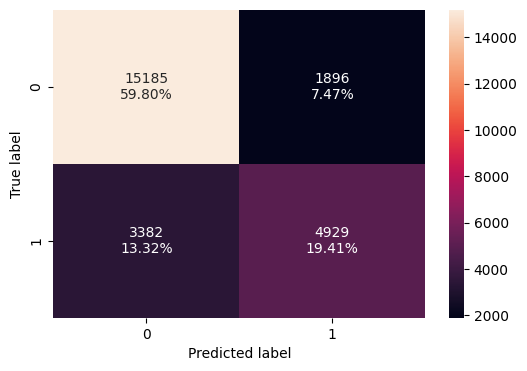


Confusion Matrix for Test Data:


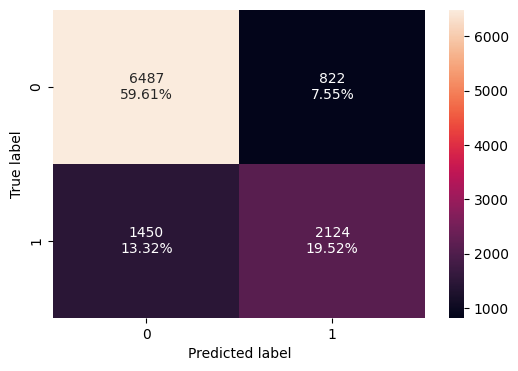

In [198]:
# Confusion matrix on the training data
print("Confusion Matrix for Training Data:")
confusion_matrix_statsmodels(lg10, X_train10, y_train)
plt.show()

print("\nConfusion Matrix for Test Data:")
confusion_matrix_statsmodels(lg10, X_test10, y_test)
plt.show()

In [199]:
# Model performance on the training data
print("Model Performance on Training Data:")
display(model_performance_classification_statsmodels(lg10, X_train10, y_train))

# Model performance on the test data
print("\nModel Performance on Test Data:")
display(model_performance_classification_statsmodels(lg10, X_test10, y_test))

Model Performance on Training Data:


Accuracy    Recall  Precision        F1
0  0.792139  0.593069   0.722198  0.651295


Model Performance on Test Data:


Accuracy    Recall  Precision        F1
0  0.791234  0.594292   0.720978  0.651534

## Tuning the Threshold

In [200]:
# Create lists to store metrics
train_accuracy = []
test_accuracy = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []
train_f1 = []
test_f1 = []
thresholds = []

# Define a range of thresholds to evaluate
for threshold in np.arange(0, 1, 0.01):
    train_perf = model_performance_classification_statsmodels(lg10, X_train10, y_train, threshold=threshold)
    test_perf = model_performance_classification_statsmodels(lg10, X_test10, y_test, threshold=threshold)

    train_accuracy.append(train_perf['Accuracy'][0])
    test_accuracy.append(test_perf['Accuracy'][0])
    train_recall.append(train_perf['Recall'][0])
    test_recall.append(test_perf['Recall'][0])
    train_precision.append(train_perf['Precision'][0])
    test_precision.append(test_perf['Precision'][0])
    train_f1.append(train_perf['F1'][0])
    test_f1.append(test_perf['F1'][0])
    thresholds.append(threshold)

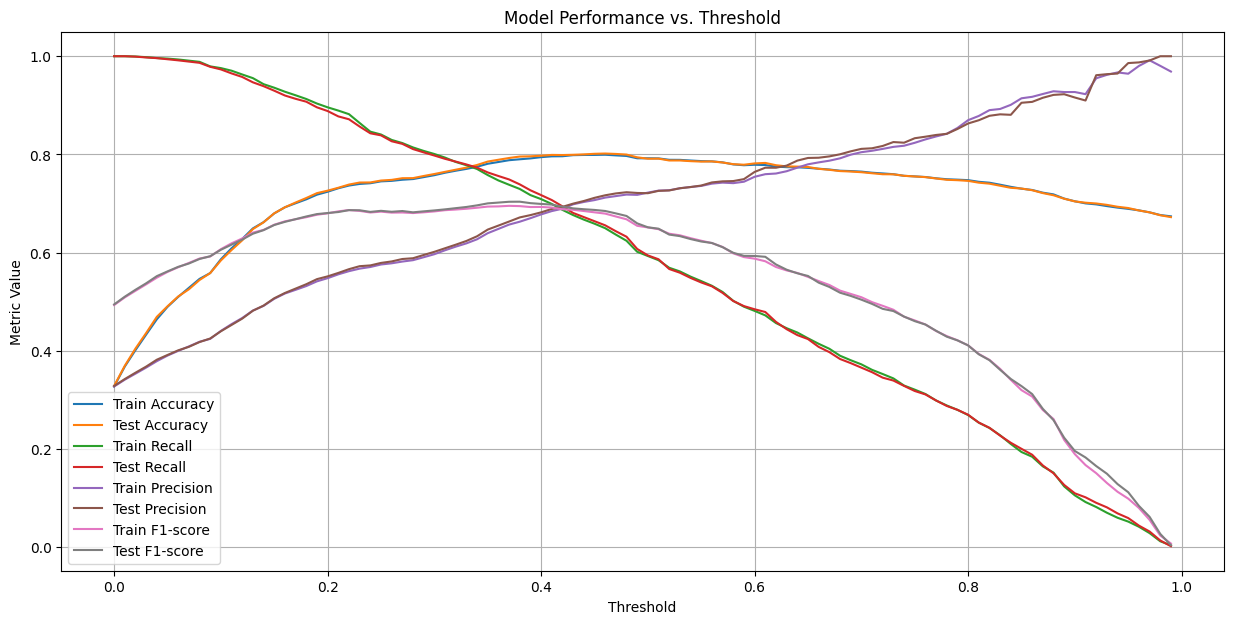

In [201]:
plt.figure(figsize=(15, 7))
plt.plot(thresholds, train_accuracy, label='Train Accuracy')
plt.plot(thresholds, test_accuracy, label='Test Accuracy')
plt.plot(thresholds, train_recall, label='Train Recall')
plt.plot(thresholds, test_recall, label='Test Recall')
plt.plot(thresholds, train_precision, label='Train Precision')
plt.plot(thresholds, test_precision, label='Test Precision')
plt.plot(thresholds, train_f1, label='Train F1-score')
plt.plot(thresholds, test_f1, label='Test F1-score')

plt.title('Model Performance vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

Now, based on the plot above, we can choose a threshold that balances the trade-off between different metrics (Accuracy, Recall, Precision, F1-score) according to the specific goals of the problem. A lower threshold will increase recall but decrease precision, and vice-versa. To reduce both False Positives (0,1) and False Negatives (1,0) in the confusion matrix, we should look for a threshold where precision and recall are reasonably balanced, or prioritize the metric that is most important for the business problem (e.g., if minimizing lost revenue from cancellations is critical, we might prioritize recall).

Let's examine the metrics dataframe at different thresholds to make a more informed decision.

Confusion Matrix for Training Data with threshold = 0.4:


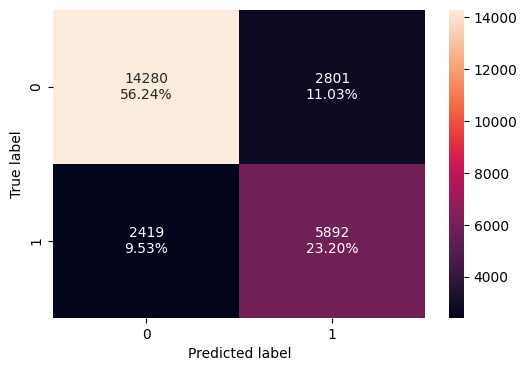


Confusion Matrix for Test Data with threshold = 0.4:


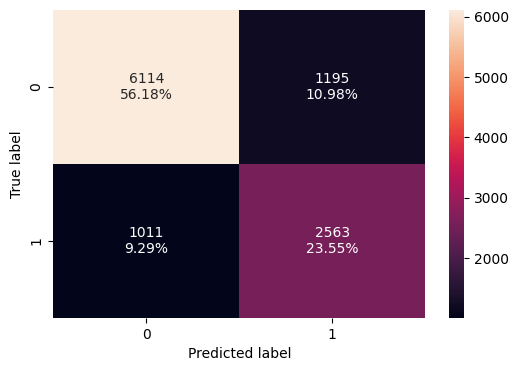


Model Performance on Training Data with threshold = 0.4:


Accuracy   Recall  Precision        F1
0  0.794423  0.70894   0.677787  0.693013


Model Performance on Test Data with threshold = 0.4:


Accuracy    Recall  Precision        F1
0  0.797299  0.717124   0.682012  0.699127

In [202]:
# Evaluate the model with a chosen threshold (e.g., 0.4)
chosen_threshold = 0.4

print(f"Confusion Matrix for Training Data with threshold = {chosen_threshold}:")
confusion_matrix_statsmodels(lg10, X_train10, y_train, threshold=chosen_threshold)
plt.show()

print(f"\nConfusion Matrix for Test Data with threshold = {chosen_threshold}:")
confusion_matrix_statsmodels(lg10, X_test10, y_test, threshold=chosen_threshold)
plt.show()

print(f"\nModel Performance on Training Data with threshold = {chosen_threshold}:")
display(model_performance_classification_statsmodels(lg10, X_train10, y_train, threshold=chosen_threshold))

print(f"\nModel Performance on Test Data with threshold = {chosen_threshold}:")
display(model_performance_classification_statsmodels(lg10, X_test10, y_test, threshold=chosen_threshold))

#Feature Importances (Absolute Coefficient Value)

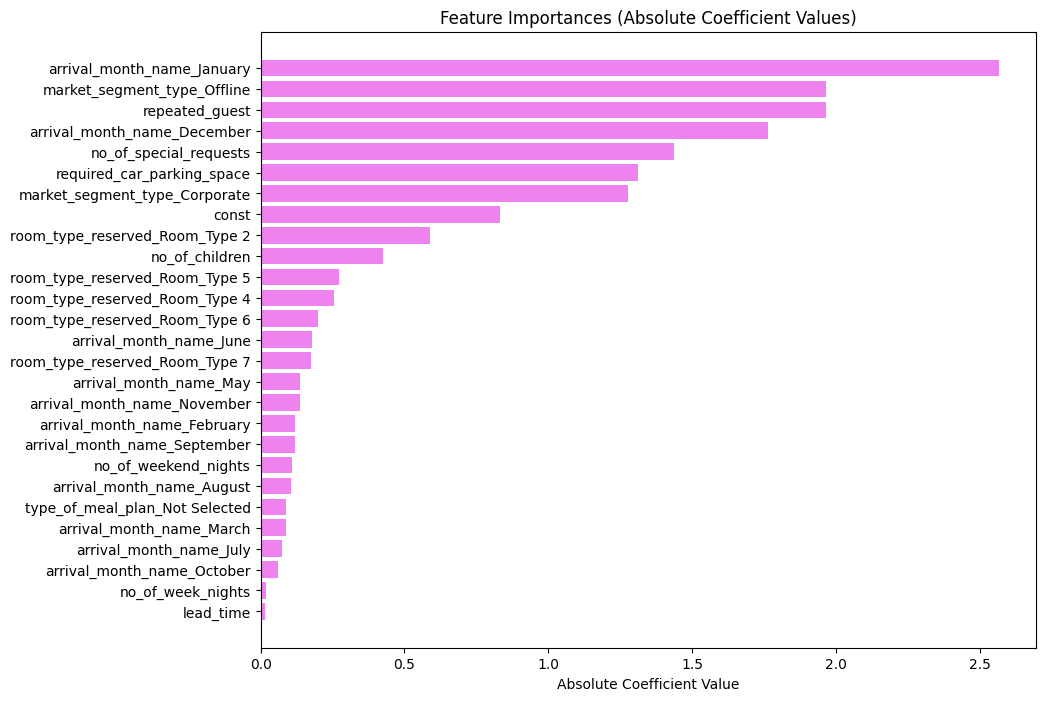

In [203]:
# Use the coefficients from the trained statsmodels logistic regression model (lg10)
coefficients = lg10.params

feature_names = list(X_train10.columns)
importances = np.abs(coefficients)

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Absolute Coefficient Values)")
plt.barh(range(len(indices)), importances.iloc[indices], color="violet", align="center") # Corrected indexing
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Absolute Coefficient Value")
plt.show()

In [204]:
# Remove less important fields
X_train_reduced = X_train10.drop([
    'arrival_month_name_October',
    'arrival_month_name_July',
    'arrival_month_name_March',
    'type_of_meal_plan_Not Selected'
], axis=1)

X_test_reduced = X_test10.drop([
    'arrival_month_name_October',
    'arrival_month_name_July',
    'arrival_month_name_March',
    'type_of_meal_plan_Not Selected'
], axis=1)

logit_reduced = sm.Logit(y_train, X_train_reduced.astype(float))
lg_reduced = logit_reduced.fit(disp=False)

print(lg_reduced.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.3189
Time:                        16:03:49   Log-Likelihood:                -10934.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.8114      0.046    -17.507      0.000      -0.902      -0.721
no_of_children                     0.4145      0.059      6.997      0.

Confusion Matrix for Training Data (Reduced Model):


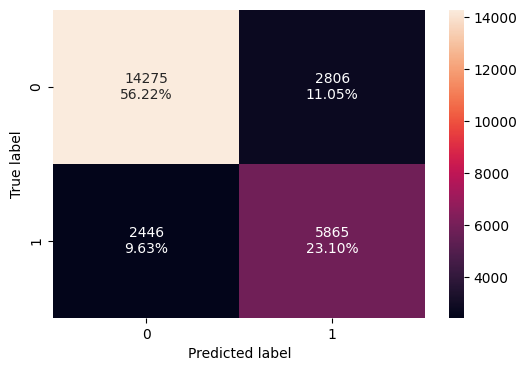


Confusion Matrix for Test Data (Reduced Model):


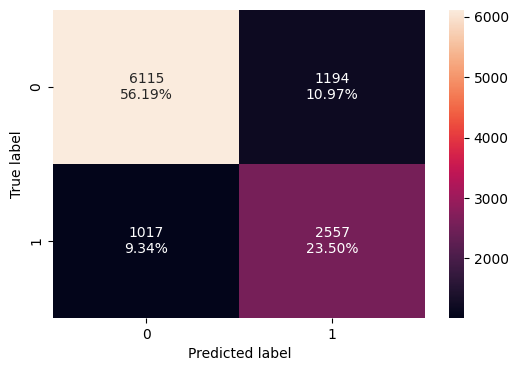


Model Performance on Training Data (Reduced Model):


Accuracy    Recall  Precision        F1
0  0.793163  0.705691   0.676393  0.690731


Model Performance on Test Data (Reduced Model):


Accuracy    Recall  Precision        F1
0  0.796839  0.715445   0.681685  0.698157

In [205]:
# Confusion matrix on the training data with the reduced model
print("Confusion Matrix for Training Data (Reduced Model):")
confusion_matrix_statsmodels(lg_reduced, X_train_reduced, y_train, threshold=chosen_threshold)
plt.show()

print("\nConfusion Matrix for Test Data (Reduced Model):")
confusion_matrix_statsmodels(lg_reduced, X_test_reduced, y_test, threshold=chosen_threshold)
plt.show()

print("\nModel Performance on Training Data (Reduced Model):")
display(model_performance_classification_statsmodels(lg_reduced, X_train_reduced, y_train, threshold=chosen_threshold))

print("\nModel Performance on Test Data (Reduced Model):")
display(model_performance_classification_statsmodels(lg_reduced, X_test_reduced, y_test, threshold=chosen_threshold))

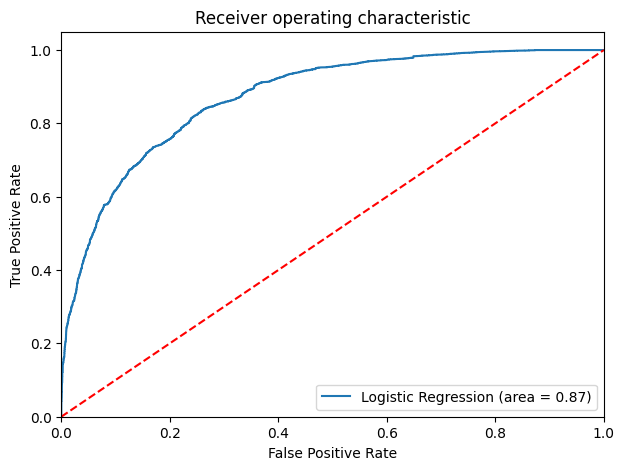

In [206]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Optimal threshold using AUC-ROC curve

In [207]:
# Optimal threshold as per AUC-ROC curve
# This threshold occurs where the true positive rate (tpr) is highest and the false positive rate (fpr) is lowest
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.27549878400104655


Checking model performance on training set

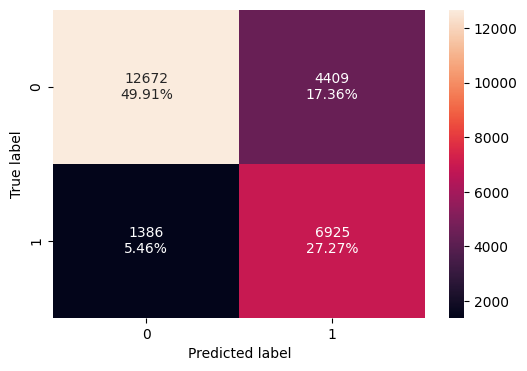

In [208]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

In [209]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.771779  0.833233   0.610993  0.705014

With this optimal threshold the precision score decreased, but, more importantly, both the recall and F1 scores improved.

Therefore, the model with this threshold is more useful for INN Hotel's intended use case.

# Optimal threshold using the Precision-Recall curve

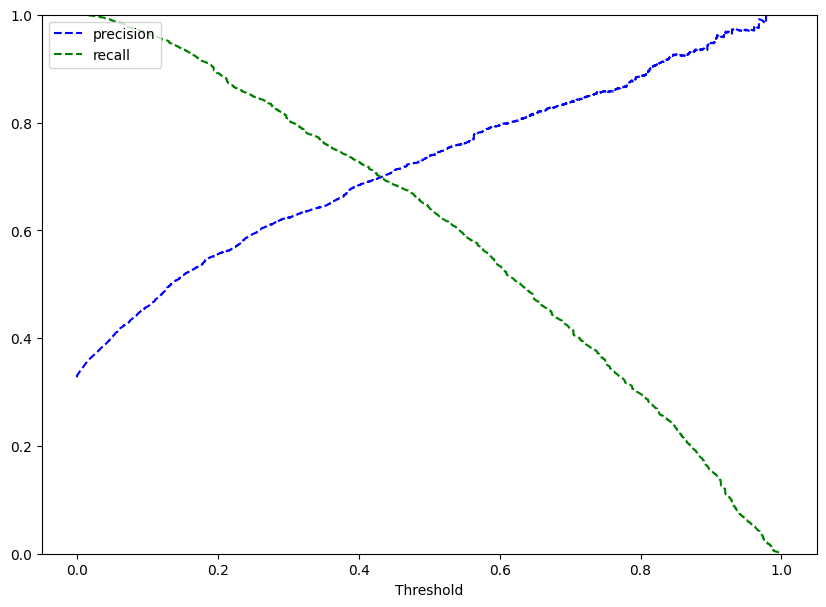

In [210]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of approximately 0.42, we reach a balance of recall and precision scores.

In [211]:
# setting the threshold
optimal_threshold_curve = 0.42

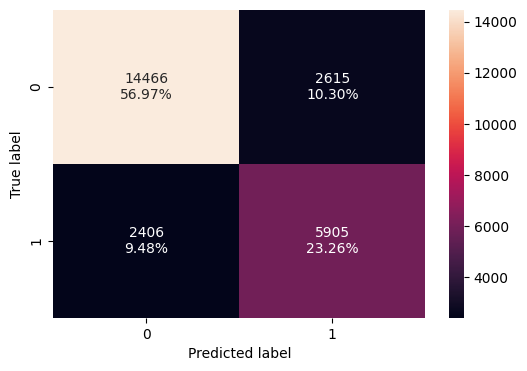

In [212]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [213]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.802261  0.710504   0.693075  0.701681

Model is performing well on training set.

There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

#Model Building - Decision Tree Model

Build Decision Tree Model

In [214]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [215]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [216]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Checking model performance on training set

In [217]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision       F1
0  0.994683  0.987246   0.996478  0.99184

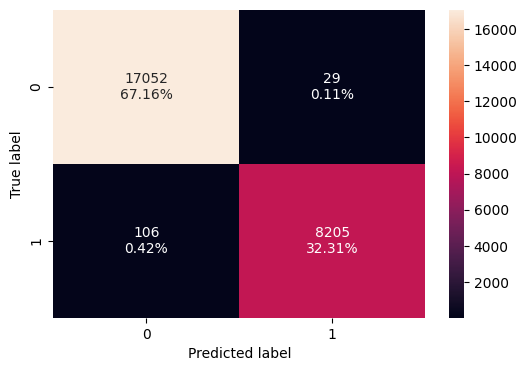

In [218]:
confusion_matrix_sklearn(model, X_train, y_train)

Checking model performance on test set

In [219]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.868143  0.797426   0.800337  0.798879

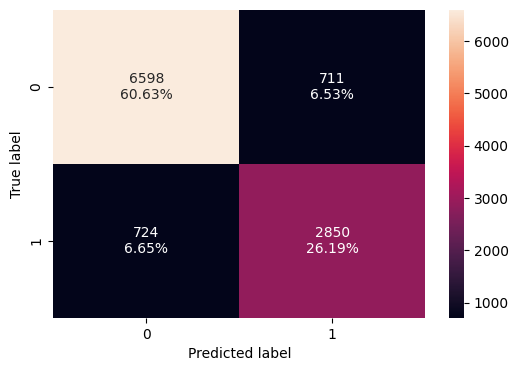

In [220]:
confusion_matrix_sklearn(model, X_test, y_test)

Model is giving good and generalized results on training and test set.

Visualizing the Decision Tree

In [221]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'arrival_month_name_August', 'arrival_month_name_December', 'arrival_month_name_February', 'arrival_month_name_January', 'arrival_month_name_July', 'arrival_month_name_June', 'arrival_month_name_March', 'arrival_month_name_May', 'arrival_month_na

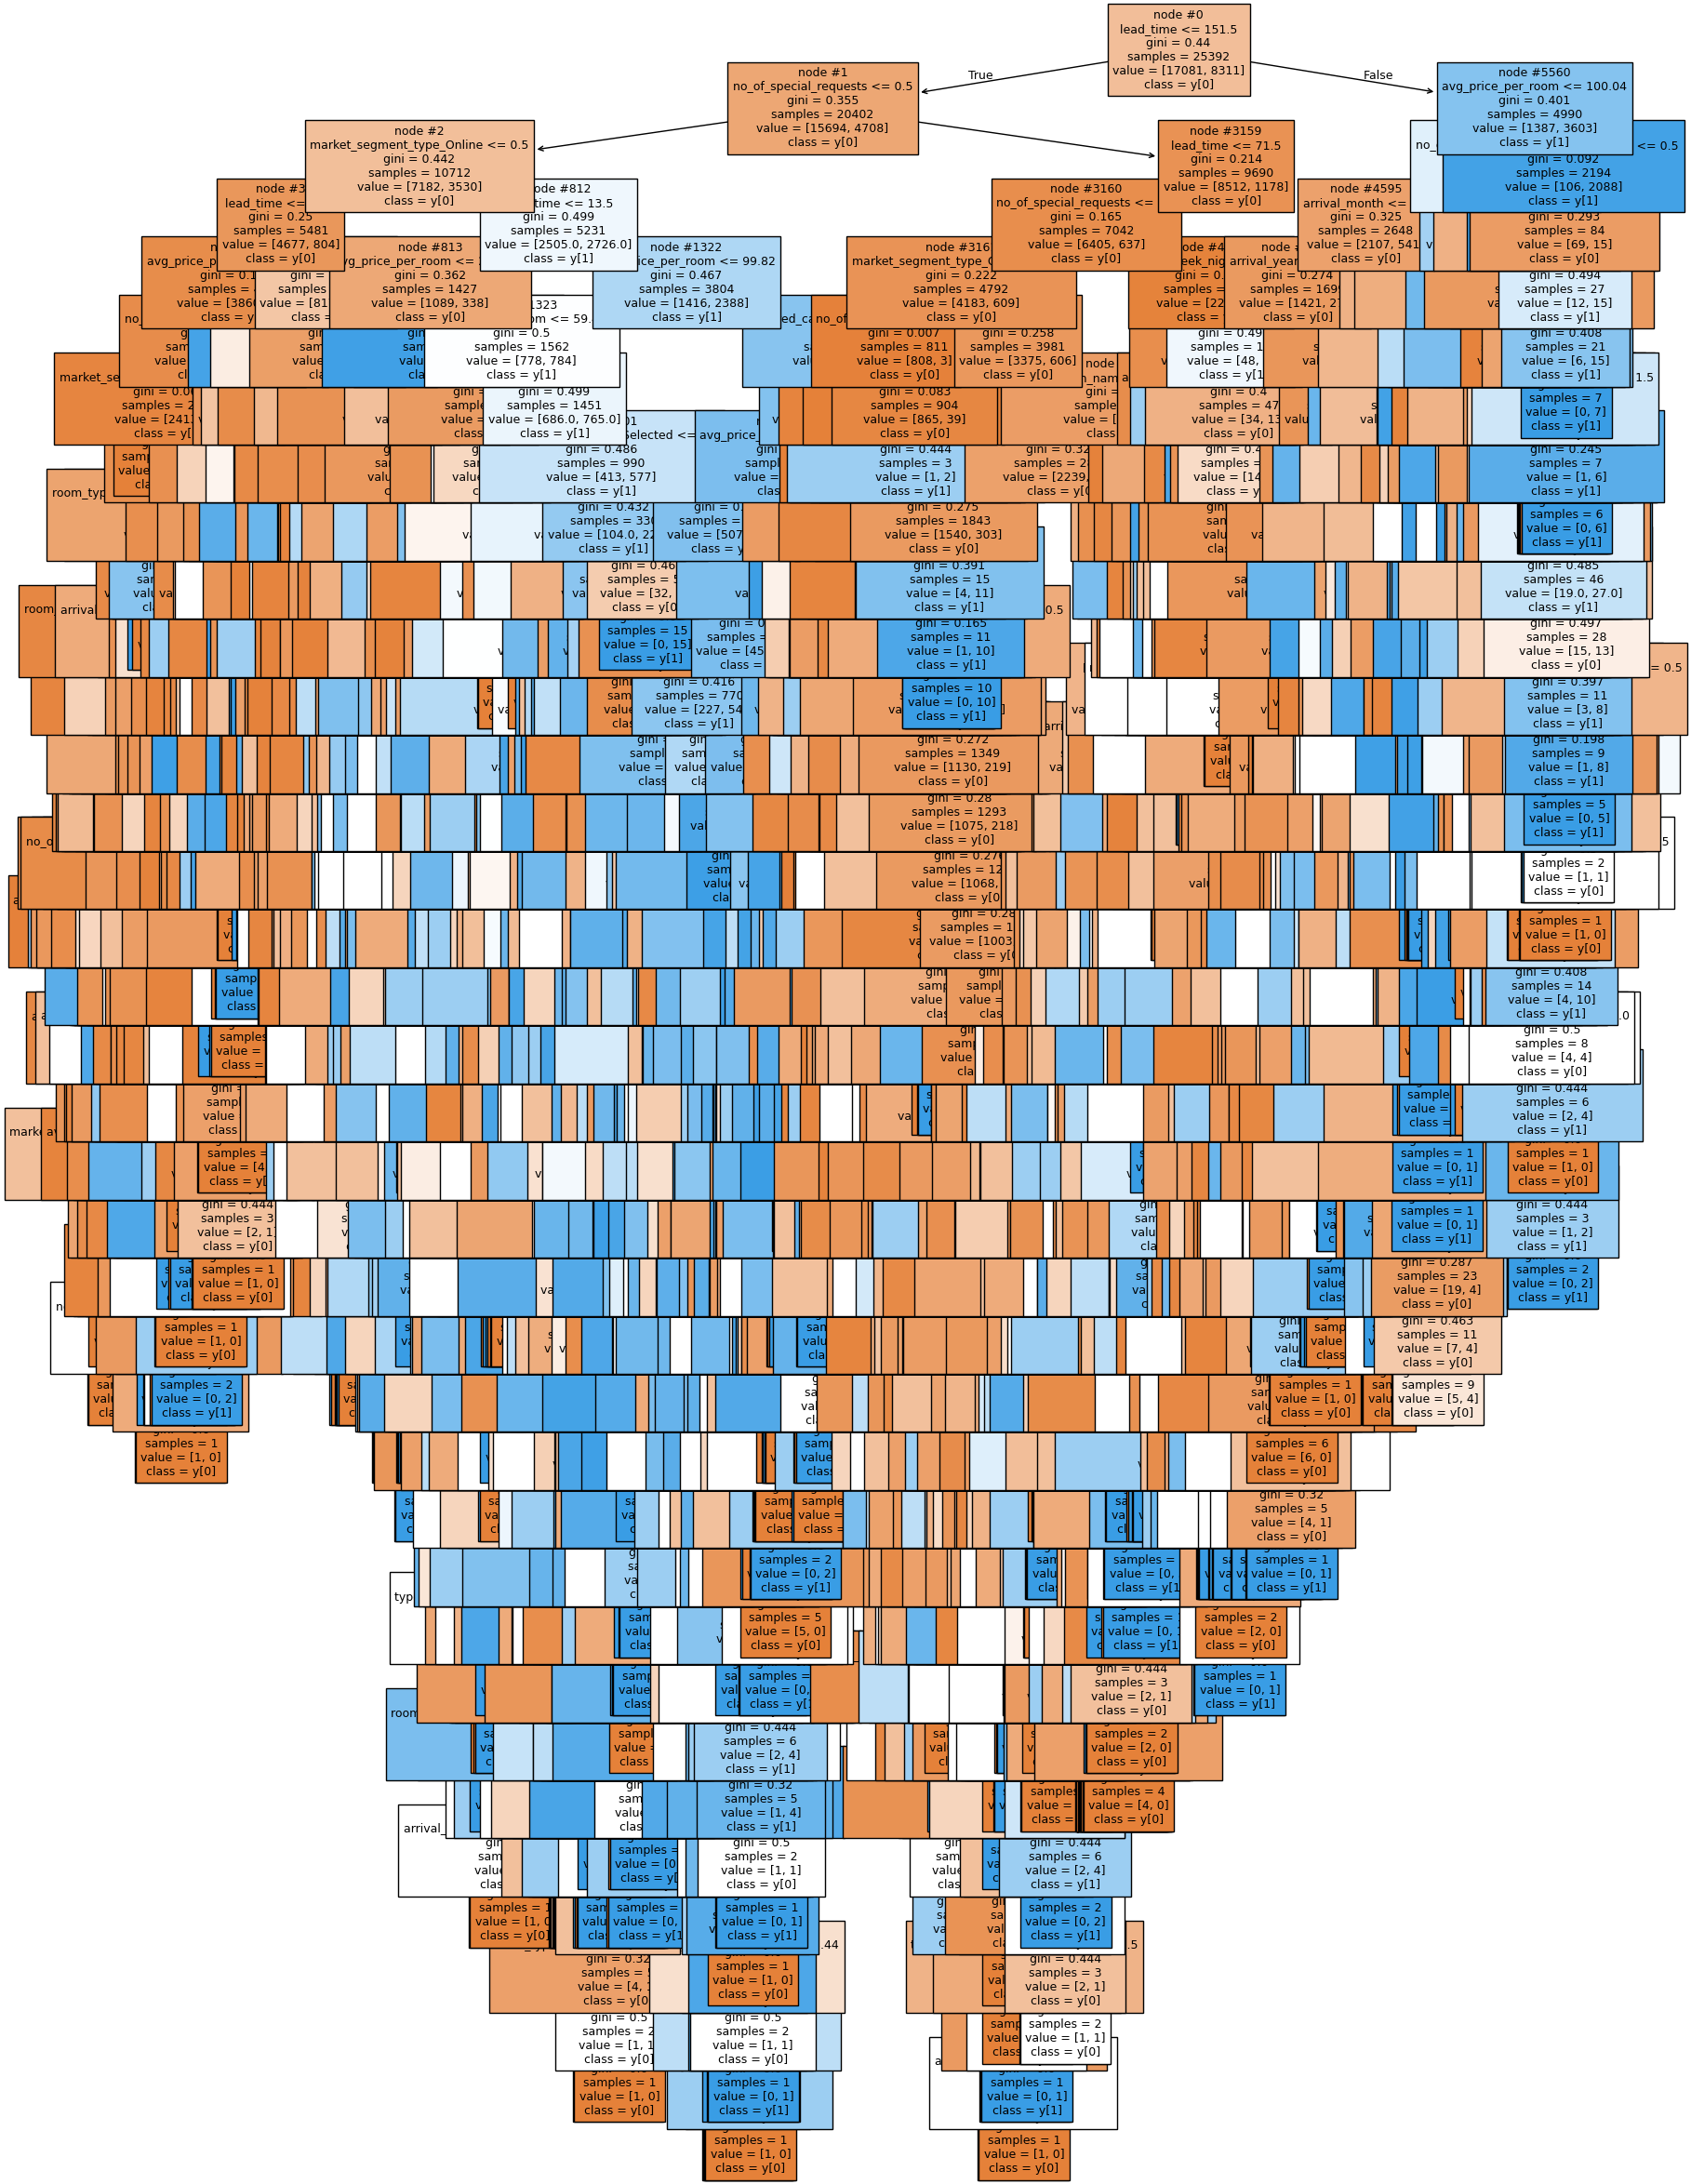

In [222]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [223]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 162.53
|   |   |   |   |   |   |   |   |   |--- lead_time <= 19.50
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- lead_time >  19.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 18.50
|   |   |   |   |   |   |   |   |   |   |   |--- tru

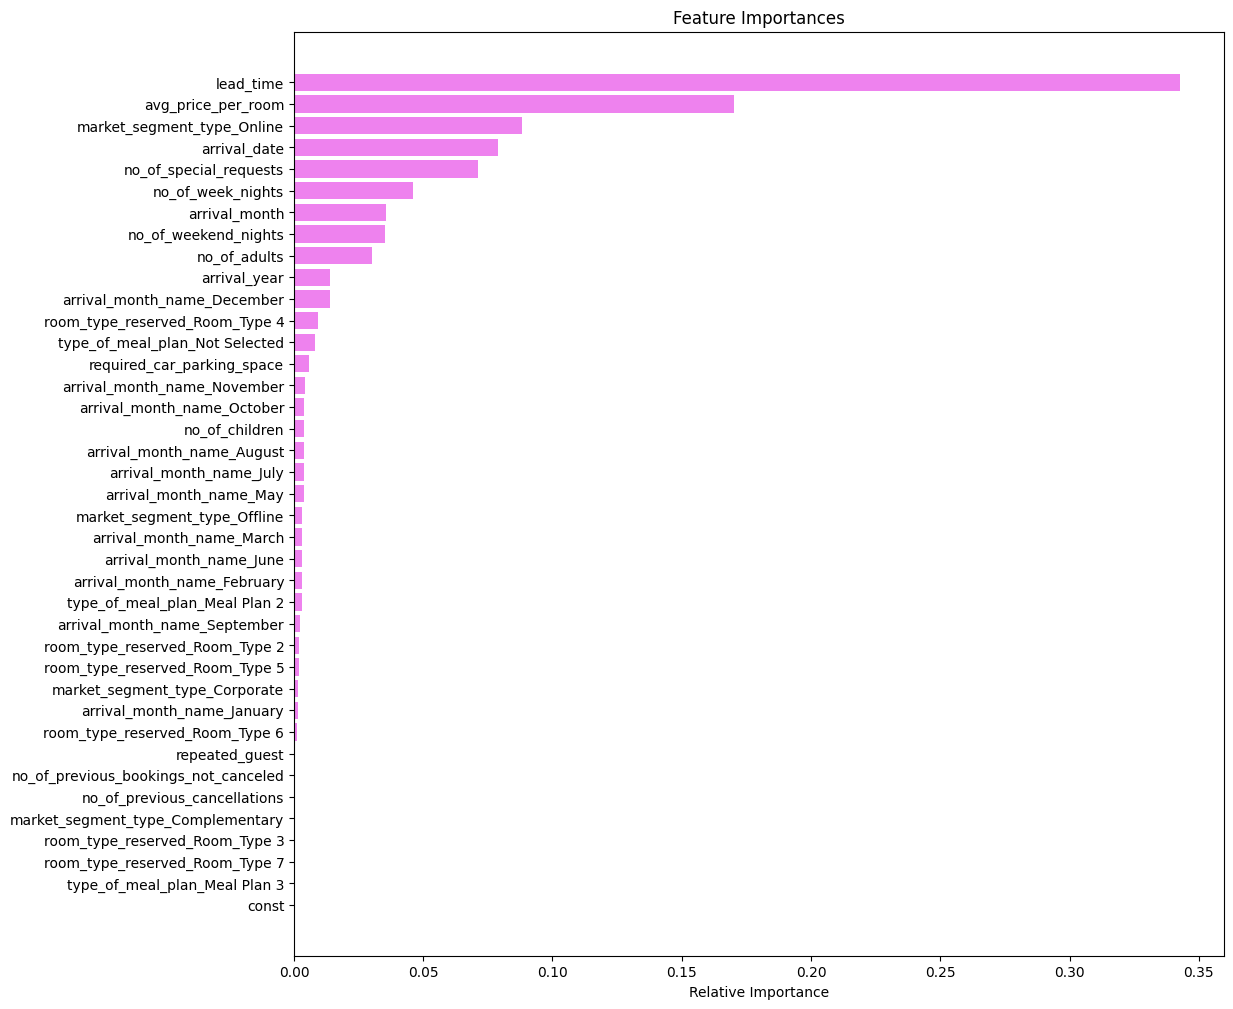

In [224]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead time , avg price room , markit segment type online , arrivel data, no of specific request ,no of week night , no of weekend nights  are importent fectors

#Decision Tree (Pre-pruning)
Using GridSearch for Hyperparameter tuning of our tree model

Let's see if we can improve our model performance even more.

In [225]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-05,
                       random_state=1)

Checking performance on training set

In [226]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision       F1
0  0.994683  0.987246   0.996478  0.99184

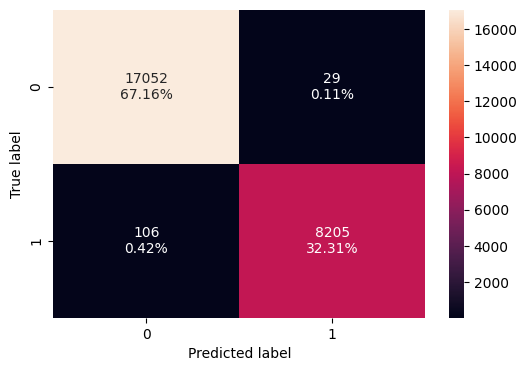

In [227]:
confusion_matrix_sklearn(estimator, X_train, y_train)

The Recall has improved on the training set as compared to the initial model.

Checking model performance on test set

In [228]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0   0.86704  0.800224   0.795992  0.798102

After hyperparameter tuning the model has performance has remained same and the model has become simpler.

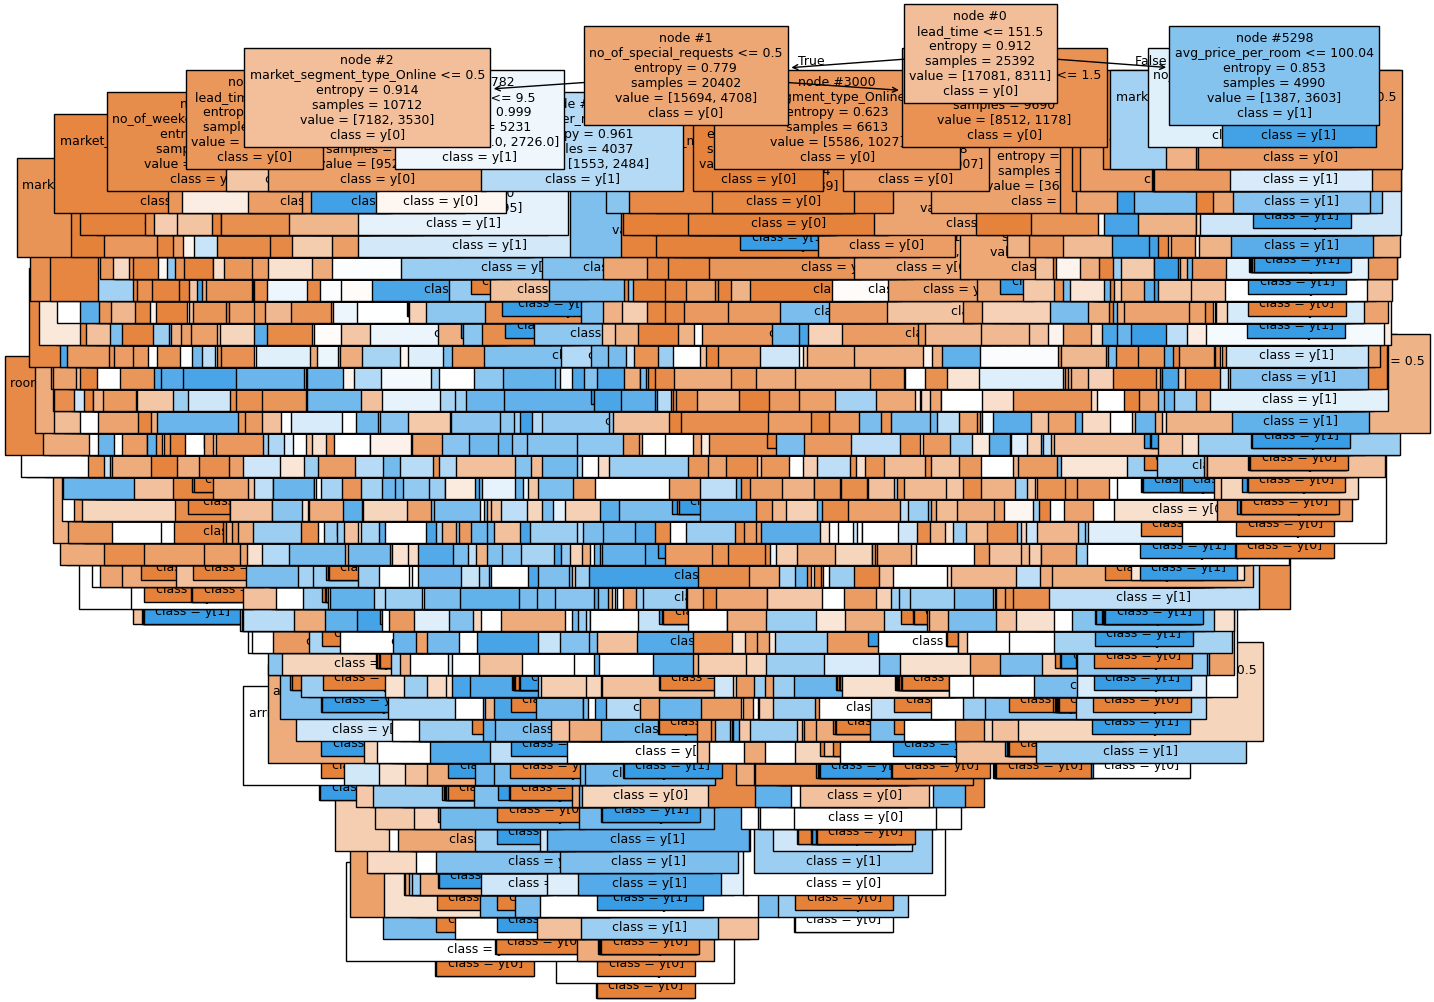

In [229]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

We are getting a simplified tree after pre-pruning.

#Cost Complexity Pruning

In [230]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [231]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007113
1     1.842455e-07    0.007113
2     3.811208e-07    0.007113
3     3.952364e-07    0.007114
4     4.375831e-07    0.007114
...            ...         ...
1349  7.079816e-03    0.288491
1350  1.248946e-02    0.300981
1351  1.626436e-02    0.317245
1352  2.344453e-02    0.364134
1353  7.622051e-02    0.440355

[1354 rows x 2 columns]

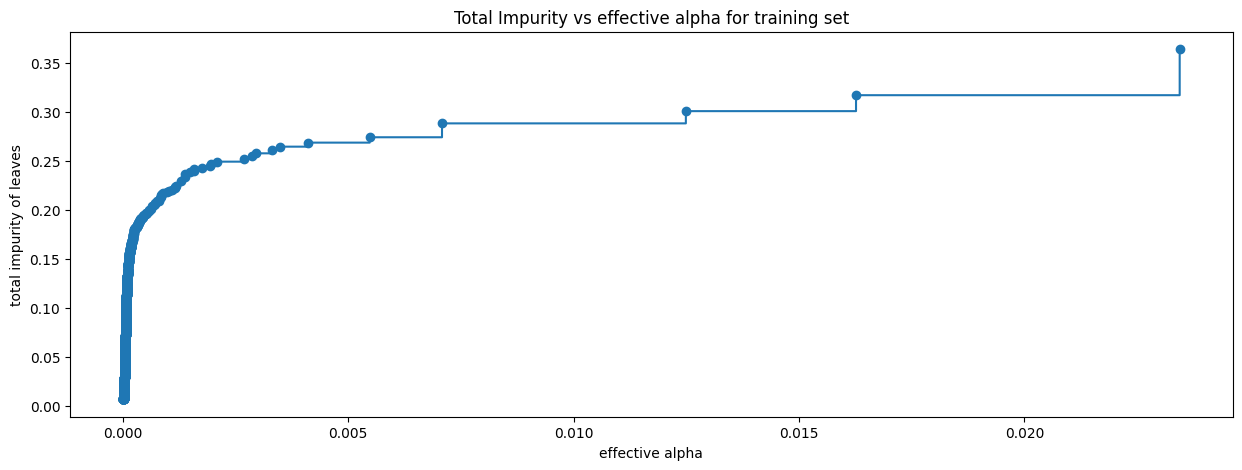

In [232]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [233]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07622051421646786


Number of nodes in the last tree is: 1 with ccp_alpha: 7.622015
For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

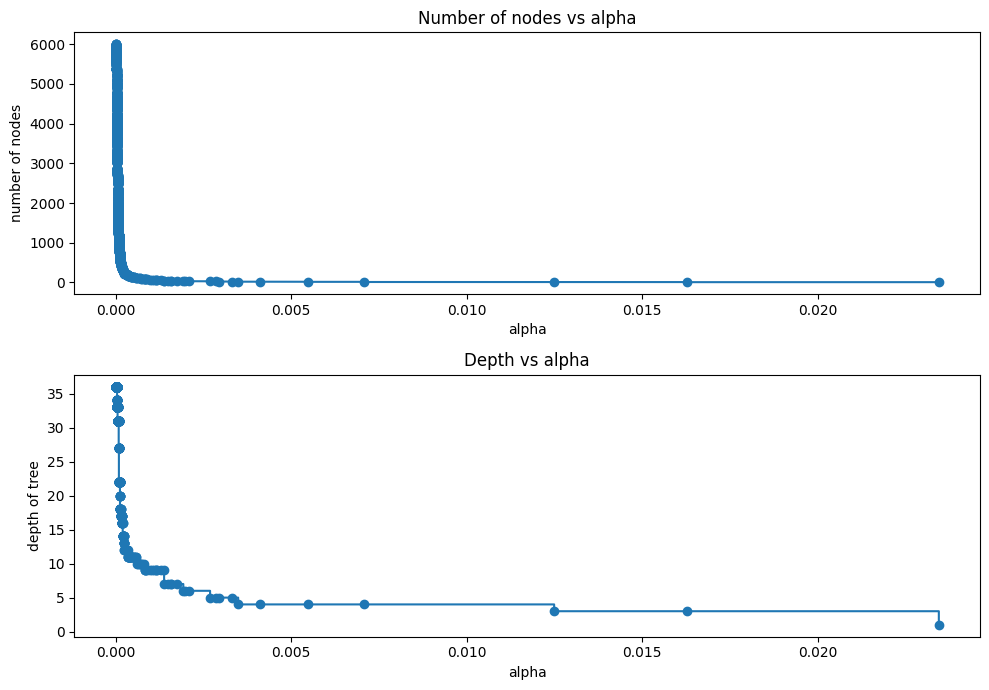

In [234]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#Recall vs alpha for training and testing sets

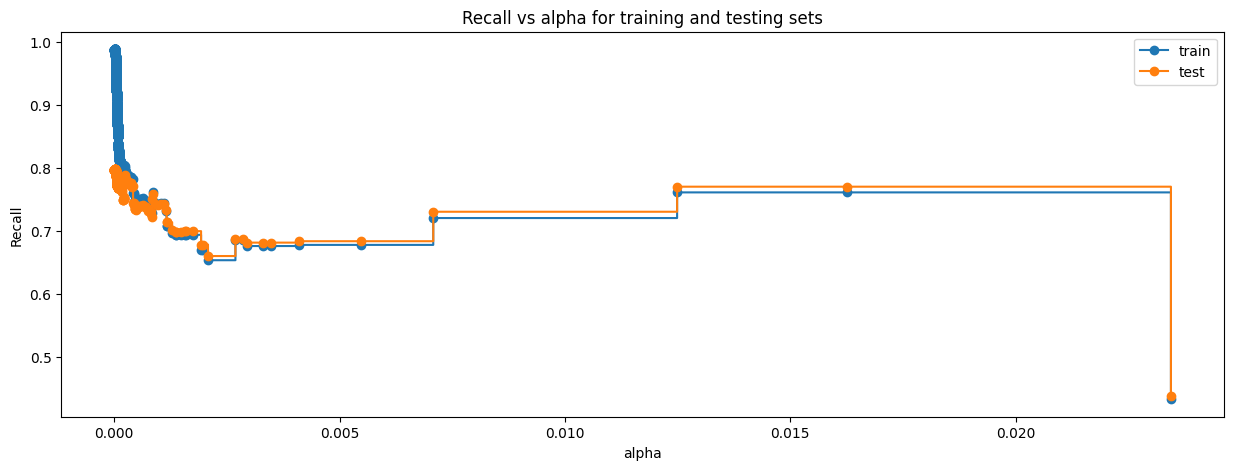

In [235]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [236]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(2.471057736264008e-05),
                       random_state=1)


#Checking model performance on training set

In [237]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.868143  0.797985        0.8  0.798991

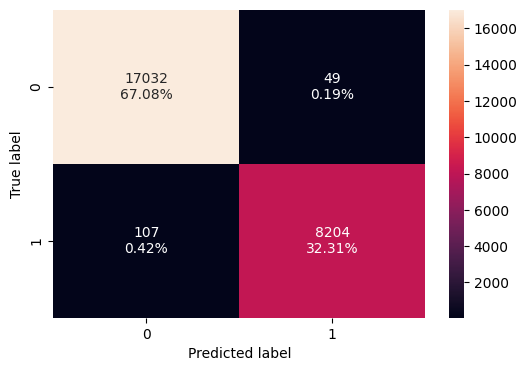

In [238]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#Visualizing the Decision Tree

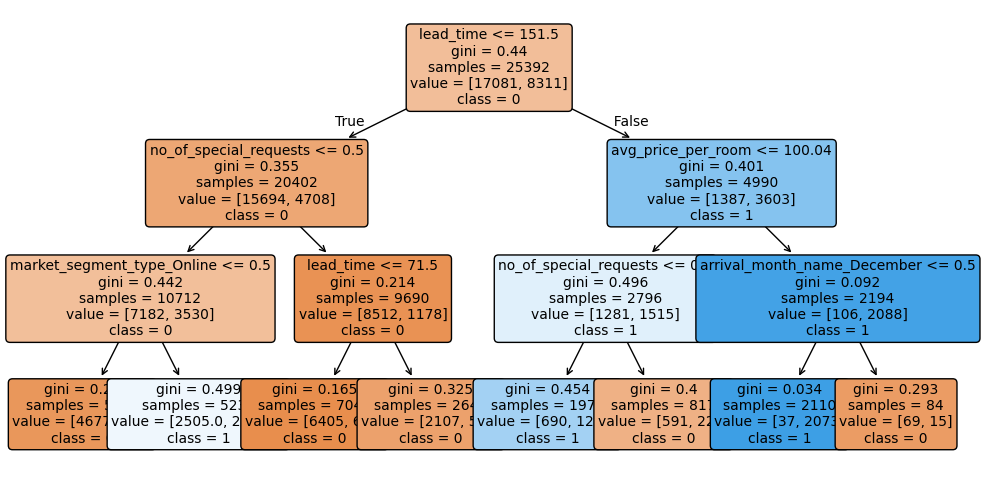

In [239]:
from sklearn import tree
import matplotlib.pyplot as plt

# Train a simplified decision tree
simple_dtree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,              # Limit tree depth
    min_samples_leaf=50,      # Avoid very small leaves
    random_state=1
)
simple_dtree.fit(X_train, y_train)

# Convert numeric class names to strings
class_names_str = [str(c) for c in simple_dtree.classes_]

plt.figure(figsize=(12, 6))
tree.plot_tree(
    simple_dtree,
    feature_names=list(feature_names),
    class_names=class_names_str,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()



In [240]:
from sklearn import tree

# Train a simpler decision tree
simple_dtree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,          # Limit tree depth
    min_samples_leaf=50,  # Avoid tiny leaves
    random_state=1
)
simple_dtree.fit(X_train, y_train)

# Print simplified tree
print(tree.export_text(simple_dtree, feature_names=list(feature_names), show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4677.00, 804.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2505.00, 2726.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- lead_time <= 71.50
|   |   |   |--- weights: [6405.00, 637.00] class: 0
|   |   |--- lead_time >  71.50
|   |   |   |--- weights: [2107.00, 541.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [690.00, 1289.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [591.00, 226.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month_name_December <= 0.50
|   |   |   |--- weights: [37.00, 2073.00] class: 1
|   |   |--- arrival_month_name_December >  0.50
|   |   |   |--- weights: [69.00, 15.00] class: 0



In [241]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

feature_importance_df = (
    pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": best_model.feature_importances_
    })
    .sort_values(by="Importance", ascending=False)
    .reset_index(drop=True)
)

print(feature_importance_df)

                                 Feature  Importance
0                              lead_time    0.343251
1                     avg_price_per_room    0.169794
2             market_segment_type_Online    0.088515
3                           arrival_date    0.078609
4                 no_of_special_requests    0.071550
5                      no_of_week_nights    0.045607
6                          arrival_month    0.035614
7                   no_of_weekend_nights    0.035004
8                           no_of_adults    0.030122
9                           arrival_year    0.014154
10           arrival_month_name_December    0.014050
11        room_type_reserved_Room_Type 4    0.009447
12        type_of_meal_plan_Not Selected    0.007959
13            required_car_parking_space    0.006026
14           arrival_month_name_November    0.004326
15            arrival_month_name_October    0.003888
16                        no_of_children    0.003869
17               arrival_month_name_July    0.

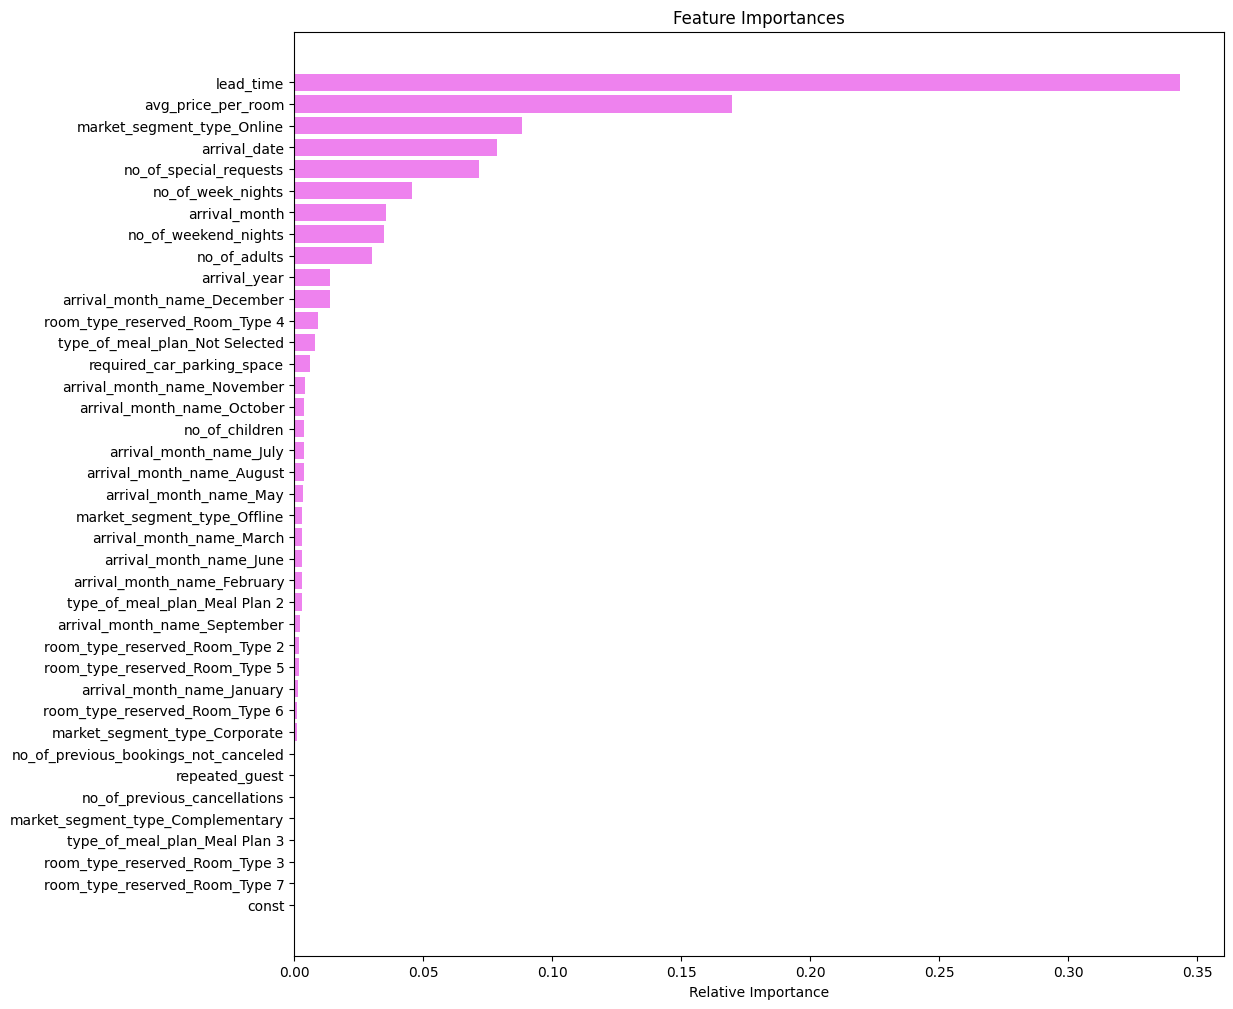

In [242]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

FICO score, duration of the loan, and gender remain the most important feature with post-pruning too.

Comparison of Models and Final Model Selection

In [243]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994683                     0.994683   
Recall                  0.987246                     0.987246   
Precision               0.996478                     0.996478   
F1                      0.991840                     0.991840   

           Decision Tree (Post-Pruning)  
Accuracy                       0.993856  
Recall                         0.987125  
Precision                      0.994063  
F1                             0.990582

In [244]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.868143                     0.867040   
Recall                  0.797426                     0.800224   
Precision               0.800337                     0.795992   
F1                      0.798879                     0.798102   

           Decision Tree (Post-Pruning)  
Accuracy                       0.868143  
Recall                         0.797985  
Precision                      0.800000  
F1                             0.798991

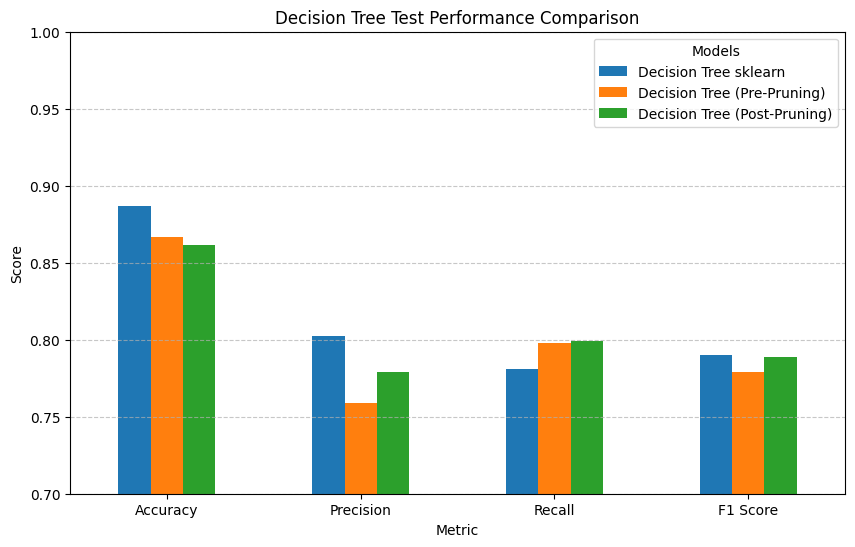

In [245]:


# Create dataframe of test performance (from your screenshot)
models_test_comp_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Decision Tree sklearn": [0.8871, 0.8022, 0.7808, 0.7902],
    "Decision Tree (Pre-Pruning)": [0.8670, 0.7592, 0.7978, 0.7792],
    "Decision Tree (Post-Pruning)": [0.8613, 0.7791, 0.7992, 0.7891]
})

# Set metric as index
models_test_comp_df.set_index("Metric", inplace=True)

# Plot bar chart
ax = models_test_comp_df.plot(kind="bar", figsize=(10,6), rot=0)
plt.title("Decision Tree Test Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Models")
plt.show()


#EDA Questions:


What are the busiest months in the hotel?

In [246]:
busiest_months = df['arrival_month_name'].value_counts()
print("Busiest Months:\n", busiest_months)

Busiest Months:
 arrival_month_name
October      5317
September    4611
August       3813
June         3203
December     3021
November     2980
July         2920
April        2736
May          2598
March        2358
February     1704
January      1014
Name: count, dtype: int64


October months have the highest number of bookings.

Which market segment do most of the guests come from?

In [247]:
top_market_segment = df['market_segment_type'].value_counts(normalize=True) * 100
print("Guest Distribution by Market Segment (%):\n", top_market_segment)

Guest Distribution by Market Segment (%):
 market_segment_type
Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: proportion, dtype: float64


Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [248]:
avg_room_price_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)
print("Average Room Price by Market Segment:\n", avg_room_price_by_segment)

Average Room Price by Market Segment:
 market_segment_type
Online           112.256855
Aviation         100.704000
Offline           91.632679
Corporate         82.911740
Complementary      3.141765
Name: avg_price_per_room, dtype: float64


What percentage of bookings are canceled?

In [249]:
cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100
print("Booking Status (%):\n", cancellation_rate)


Booking Status (%):
 booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [250]:
repeat_cancel_rate = df[df['repeated_guest'] == 1]['booking_status'].value_counts(normalize=True) * 100
print("Repeating Guests Cancellation Rate (%):\n", repeat_cancel_rate)



Repeating Guests Cancellation Rate (%):
 booking_status
Not_Canceled    98.27957
Canceled         1.72043
Name: proportion, dtype: float64


Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

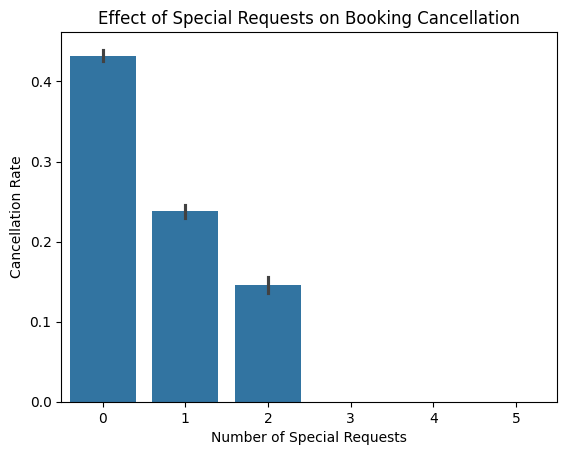

In [251]:
sns.barplot(x='no_of_special_requests', y=df['booking_status'].apply(lambda x: 1 if x=="Canceled" else 0), data=df)
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.title('Effect of Special Requests on Booking Cancellation')
plt.show()

.** Conclusions**

Unpruned Decision Tree shows overfitting:
The unpruned model performs extremely well on the training data but loses some accuracy on the test set, which indicates it does not generalize as well to new data.

Pruning improves model generalization:
Both pre-pruning and post-pruning help simplify the tree, reduce overfitting, and make the model’s performance more stable on unseen data.

Post-pruned tree gives the best balance:
While its accuracy is slightly lower than the unpruned model, its F1 score is almost the same. More importantly, the tree is simpler, easier to interpret, and better suited for real-world deployment.

** Recommendations**


Deploy the Post-Pruned Decision Tree

It provides a better balance between accuracy and simplicity.

The model is easier to explain to non-technical stakeholders.

It carries a lower risk of overfitting compared to the fully grown tree.

When recall is the top priority

If the main goal is to catch as many cancellations as possible, the pre-pruned tree is a better choice since it achieved the highest recall (~0.80).

Future Improvements

Experiment with ensemble methods like Random Forest or XGBoost to improve accuracy and robustness.

Use cross-validation to fine-tune pruning parameters and select the most reliable model.